# Explorative Datenanalyse
Im Folgenden werden die gemessenen Index-Werte der Brokkoli analysiert. Im Vorfeld wurden diese bereits innerhalb der Voronoi-Zellen segmentiert, das heisst Es werden nur noch die Pixel gewertet, welche zum Brokkoli gehören, ohne die Erde darum zu berücksichtigen.

In [1]:
%reset

# Datenabfrage von Server-DB
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class font:
    BOLD = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'

# Liste der Daten, die berücksichtigt werden
dates = ['2019-04-18', '2019-04-25', '2019-05-01', '2019-05-09', '2019-05-16', '2019-05-24', '2019-06-04','2019-06-13', 
         '2019-06-18']

# Verbindungsaufbau
server = 'deepbroccoliserver.database.windows.net'
database = 'DeepBroccoliDatabase'
username = 'ntb'
password = 'brokkoli_2019'
driver= '{SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

# Abfrage definieren und ausführen: Alle Brokkoli mit allen dazugehörigen Messwerten 
query = '''
SELECT
    dbo.broccoli.id, dbo.broccoli.cropWeight, dbo.broccoli.cropMissing, dbo.broccoli.cropOverripe, 
    dbo.broccoli.cropRudimentary, dbo.broccoli.cropRotten, dbo.broccoli.cropUnripe, dbo.broccoli.cropNoBlossom, 
    dbo.broccoli.rowNumber, 
    dbo.broccolivalues.timestamp, dbo.broccoli.lat, dbo.broccoli.long, dbo.broccolivalues.pixelCount, 
    dbo.broccolivalues.maxNDVI, dbo.broccolivalues.minNDVI, dbo.broccolivalues.meanNDVI, dbo.broccolivalues.medianNDVI, 
    dbo.broccolivalues.NDVI_15_QUANTILE, dbo.broccolivalues.NDVI_25_QUANTILE, dbo.broccolivalues.NDVI_75_QUANTILE, 
    dbo.broccolivalues.NDVI_85_QUANTILE,
    dbo.broccolivalues.maxNDRE, dbo.broccolivalues.minNDRE, dbo.broccolivalues.meanNDRE, dbo.broccolivalues.medianNDRE,
    dbo.broccolivalues.NDRE_15_QUANTILE, dbo.broccolivalues.NDRE_25_QUANTILE, dbo.broccolivalues.NDRE_75_QUANTILE,
    dbo.broccolivalues.NDRE_85_QUANTILE
FROM 
    dbo.broccoli INNER JOIN dbo.broccolivalues ON dbo.broccoli.id = dbo.broccolivalues.id
WHERE
    dbo.broccoli.id NOT IN (SELECT broccoli_id FROM dbo.broccoliBlacklist)
    AND dbo.broccolivalues.timestamp IN (''' + "\'" + "\', \'".join(dates) + "\')"

broccoli_data = pd.read_sql_query(query, cnxn)
cnxn.close()

# Löschen von Datensätzen mit NaN-Werten (Ist der Fall falls pixelCount == 0)
#print()
#print("Anzahl Datensätze: " + str(len(broccoli_data)))

#broccoli_data.dropna(inplace=True)
#print("Anzahl Datensätze ohne NaN: " + str(len(broccoli_data)))
#print()

# Describe: Erste Übersicht
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    print(font.BOLD + font.UNDERLINE + date + font.END)
    display(broccoli_data_byDate.describe())
    print()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
2019-04-18


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean     37.410145     0.598889     0.424898     0.508310     0.508736  ...   
std       9.230402     0.042482     0.030691     0.037155     0.039452  ...   
min       7.000000     0.309548     0.226267     0.273390     0.271562  ...   
25%      31.000000     0.571925     0.405685     0.484948     0.483071  ...   
50%      37.000000     0.600231     0.425229     0.509222     0.509751  ...   
75%      43.000000     0.626902     0.445488     0.533910     0.535770  ...   
max      78.000000     0.728941     0.539897     0.646206     0.663208  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.546759          0.563153     0.190512    -0.013122   
std            0.040960          0.041587     0.043510     0.046187   
min            0.299500          0.304524     0.065542    -0.229784   
25%            0.519623          0.536239     0.160061    -0.040633   
50%            0.547799          0.563648     0.187688    -0.006417   
75%            0.574098          0.591872     0.215755     0.021852   
max            0.699201          0.705629     0.422623     0.109630   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.088713     0.088916          0.038438          0.056156   
std       0.026980     0.028796          0.033607          0.030972   
min      -0.030301    -0.038446         -0.117262         -0.068451   
25%       0.071721     0.071928          0.017181          0.037039   
50%       0.092238     0.092535          0.044927          0.062386   
75%       0.106976     0.108778          0.062828          0.077606   
max       0.161575     0.177574          0.116594          0.154753   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.121499          0.138751  
std            0.029669          0.031474  
min            0.008623          0.033885  
25%            0.102800          0.118557  
50%            0.122096          0.137852  
75%            0.140737          0.158711  
max            0.282104          0.288997  

[8 rows x 22 columns]


2019-04-25


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean     46.112466     0.679512     0.481203     0.583120     0.586240  ...   
std      12.184941     0.051627     0.036737     0.046548     0.049254  ...   
min       2.000000     0.348900     0.288066     0.319579     0.319579  ...   
25%      38.000000     0.649449     0.459034     0.555060     0.555155  ...   
50%      46.000000     0.680958     0.482467     0.584308     0.587821  ...   
75%      54.000000     0.716108     0.507165     0.617241     0.621951  ...   
max     101.000000     0.810579     0.580237     0.698420     0.724812  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.630467          0.647758     0.292730     0.023408   
std            0.050712          0.050931     0.063680     0.059747   
min            0.334239          0.340104     0.072330    -0.232045   
25%            0.599772          0.616325     0.249943    -0.011633   
50%            0.632082          0.650322     0.285900     0.028109   
75%            0.667516          0.684196     0.325938     0.063892   
max            0.750291          0.769226     0.574725     0.178572   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.168077     0.170589          0.102160          0.126590   
std       0.036883     0.039542          0.040595          0.038435   
min       0.053104     0.055825         -0.117065         -0.079874   
25%       0.144202     0.144817          0.075102          0.101716   
50%       0.165865     0.169901          0.102394          0.126850   
75%       0.189145     0.193575          0.129866          0.151910   
max       0.304583     0.331391          0.230546          0.259992   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.212832          0.234079  
std            0.045698          0.050211  
min            0.056741          0.062977  
25%            0.183952          0.202310  
50%            0.209333          0.229406  
75%            0.236131          0.258961  
max            0.402568          0.426826  

[8 rows x 22 columns]


2019-05-01


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean    125.839953     0.798942     0.561470     0.682567     0.686701  ...   
std      29.665363     0.036321     0.025090     0.031510     0.033774  ...   
min      12.000000     0.518813     0.362658     0.432012     0.428802  ...   
25%     109.500000     0.781667     0.549062     0.667233     0.669827  ...   
50%     127.000000     0.803733     0.565196     0.686448     0.690078  ...   
75%     145.000000     0.822536     0.578036     0.702539     0.707746  ...   
max     344.000000     0.885956     0.621285     0.764486     0.780028  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.733162          0.753290     0.283365    -0.001075   
std            0.034353          0.034749     0.068823     0.061046   
min            0.492123          0.502049     0.094710    -0.305937   
25%            0.715676          0.736244     0.233217    -0.032878   
50%            0.736934          0.757332     0.269320     0.009127   
75%            0.755793          0.775783     0.321224     0.042765   
max            0.828266          0.847945     0.634640     0.142997   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.140253     0.140540          0.086222          0.106079   
std       0.033166     0.034838          0.041252          0.038491   
min      -0.035179    -0.044257         -0.146473         -0.111822   
25%       0.125433     0.124944          0.069167          0.090624   
50%       0.141974     0.143087          0.094110          0.112448   
75%       0.157027     0.157972          0.112649          0.128890   
max       0.266080     0.265132          0.213776          0.247302   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.174229          0.193679  
std            0.035167          0.038495  
min            0.000673          0.039560  
25%            0.155634          0.171335  
50%            0.171987          0.188173  
75%            0.188798          0.210336  
max            0.316833          0.419278  

[8 rows x 22 columns]


2019-05-09


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean    337.265041     0.862779     0.605041     0.766804     0.784535  ...   
std      76.110373     0.017931     0.012367     0.020229     0.022464  ...   
min      19.000000     0.708534     0.501618     0.597759     0.581467  ...   
25%     298.000000     0.856692     0.600703     0.760464     0.777393  ...   
50%     345.000000     0.865299     0.607263     0.770467     0.788872  ...   
75%     384.000000     0.873116     0.611991     0.779017     0.797624  ...   
max    1032.000000     0.910571     0.641869     0.819025     0.837019  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.815115          0.827435     0.252417    -0.113130   
std            0.018581          0.017840     0.059698     0.076773   
min            0.660907          0.665722     0.101483    -0.451823   
25%            0.808954          0.821609     0.210717    -0.160309   
50%            0.818638          0.830413     0.243358    -0.108237   
75%            0.825970          0.837623     0.283246    -0.057263   
max            0.867475          0.881187     0.572957     0.077098   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.092805     0.098734          0.029709          0.058222   
std       0.023406     0.023440          0.035688          0.028727   
min       0.005066     0.009349         -0.151167         -0.077773   
25%       0.078089     0.084515          0.007989          0.039863   
50%       0.093162     0.099203          0.031389          0.060393   
75%       0.106993     0.113415          0.055420          0.078315   
max       0.203677     0.203830          0.123095          0.158024   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.132700          0.152841  
std            0.025582          0.030391  
min            0.039751          0.044713  
25%            0.116624          0.133575  
50%            0.130404          0.147994  
75%            0.146293          0.167838  
max            0.265532          0.344594  

[8 rows x 22 columns]


2019-05-16


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean    451.688950     0.885108     0.620405     0.770621     0.778061  ...   
std     106.623471     0.023248     0.015377     0.023449     0.025032  ...   
min      15.000000     0.640893     0.448223     0.556581     0.565671  ...   
25%     395.000000     0.876668     0.613207     0.761049     0.767060  ...   
50%     465.000000     0.888384     0.622308     0.774026     0.781277  ...   
75%     524.000000     0.898940     0.629389     0.785282     0.793822  ...   
max     728.000000     0.936661     0.656853     0.822826     0.838612  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.818473          0.836882     0.385226    -0.019829   
std            0.024676          0.024187     0.092442     0.094783   
min            0.618026          0.635629     0.125278    -0.478812   
25%            0.807381          0.826692     0.314693    -0.071061   
50%            0.821545          0.840208     0.363347    -0.003588   
75%            0.833878          0.851781     0.437285     0.049738   
max            0.879668          0.891404     0.774605     0.155240   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.200614     0.202788          0.136563          0.161724   
std       0.034032     0.033049          0.039638          0.035283   
min       0.045758     0.046193         -0.060572         -0.027874   
25%       0.179658     0.183381          0.114102          0.142022   
50%       0.199170     0.202900          0.141633          0.164404   
75%       0.221250     0.223420          0.164404          0.185725   
max       0.405552     0.422640          0.229620          0.258156   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.242331          0.264955  
std            0.038641          0.046049  
min            0.096930          0.120490  
25%            0.218223          0.235773  
50%            0.237378          0.256402  
75%            0.262947          0.287711  
max            0.583429          0.629100  

[8 rows x 22 columns]


2019-05-24


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean    992.890287     0.913663     0.639449     0.795307     0.803189  ...   
std     212.364809     0.023943     0.017338     0.033203     0.038662  ...   
min      10.000000     0.751347     0.534392     0.620162     0.607506  ...   
25%     872.500000     0.900721     0.629431     0.775466     0.779569  ...   
50%     991.000000     0.916467     0.640486     0.799266     0.805798  ...   
75%    1112.500000     0.929308     0.650990     0.816472     0.827869  ...   
max    2325.000000     0.981058     0.757975     0.913307     0.928941  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.843781          0.861441     0.464482    -0.006826   
std            0.034425          0.031910     0.163666     0.115277   
min            0.674685          0.711386     0.144996    -0.465496   
25%            0.823038          0.842449     0.333879    -0.082565   
50%            0.847883          0.865752     0.414159    -0.008409   
75%            0.865687          0.881515     0.581992     0.070518   
max            0.949230          0.957152     0.885469     0.425145   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.259785     0.263272          0.193640          0.219646   
std       0.135127     0.137120          0.128919          0.132518   
min      -0.088654    -0.105472         -0.172560         -0.149981   
25%       0.160487     0.163028          0.100422          0.124210   
50%       0.229045     0.231213          0.170898          0.192430   
75%       0.324991     0.328015          0.254578          0.280370   
max       0.659116     0.665100          0.595982          0.624422   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.304147          0.326153  
std            0.141287          0.144268  
min           -0.041195          0.000913  
25%            0.201094          0.220627  
50%            0.268113          0.287084  
75%            0.372542          0.395557  
max            0.717508          0.744636  

[8 rows x 22 columns]


2019-06-04


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean   1147.355879     0.888555     0.626872     0.785706     0.792397  ...   
std     163.863589     0.021941     0.020948     0.025811     0.026008  ...   
min      67.000000     0.708941     0.541214     0.646173     0.648704  ...   
25%    1071.000000     0.876183     0.614129     0.770013     0.776105  ...   
50%    1152.000000     0.891929     0.627600     0.788585     0.795604  ...   
75%    1222.000000     0.904340     0.636853     0.804616     0.811634  ...   
max    2274.000000     0.944795     0.732271     0.843377     0.851201  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.822581          0.837180     0.345967    -0.179286   
std            0.023788          0.023213     0.068563     0.079946   
min            0.678211          0.691166     0.077391    -0.521817   
25%            0.808754          0.824213     0.302058    -0.226702   
50%            0.826442          0.840800     0.343587    -0.170852   
75%            0.840096          0.853946     0.388263    -0.124334   
max            0.882042          0.899964     0.570194     0.047755   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.111028     0.116760          0.021368          0.057661   
std       0.058894     0.060163          0.065387          0.063696   
min      -0.087258    -0.085649         -0.209394         -0.137427   
25%       0.071047     0.075385         -0.022807          0.013948   
50%       0.116087     0.122847          0.024034          0.062370   
75%       0.154111     0.160645          0.067576          0.104660   
max       0.250074     0.257886          0.193233          0.215394   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.169910          0.198119  
std            0.058176          0.057585  
min           -0.044954         -0.021634  
25%            0.129610          0.159283  
50%            0.176312          0.203482  
75%            0.212986          0.240557  
max            0.304265          0.346955  

[8 rows x 22 columns]


2019-06-13


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean   1455.834841     0.932889     0.708893     0.854168     0.858615  ...   
std     186.198276     0.012632     0.034908     0.018116     0.018480  ...   
min      81.000000     0.682991     0.529922     0.605577     0.611256  ...   
25%    1366.000000     0.928180     0.683560     0.846963     0.851109  ...   
50%    1437.000000     0.934412     0.712580     0.856236     0.860367  ...   
75%    1514.000000     0.939818     0.734018     0.864691     0.869089  ...   
max    3058.000000     0.956885     0.806188     0.896153     0.904995  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.887061          0.899439     0.489600     0.021120   
std            0.017489          0.016726     0.055032     0.109513   
min            0.631479          0.640784     0.247273    -0.453599   
25%            0.879606          0.892223     0.452708    -0.032580   
50%            0.888706          0.900920     0.487262     0.038682   
75%            0.897207          0.909031     0.525809     0.094805   
max            0.926101          0.933852     0.689164     0.235499   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.283183     0.286757          0.198082          0.228654   
std       0.046191     0.047507          0.052819          0.050603   
min       0.083418     0.105859         -0.078155          0.003100   
25%       0.253189     0.255377          0.159846          0.191931   
50%       0.280980     0.285523          0.195003          0.226394   
75%       0.313907     0.318763          0.235010          0.264901   
max       0.401273     0.412744          0.338219          0.355898   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.341005          0.367132  
std            0.045183          0.044617  
min            0.148243          0.160145  
25%            0.313357          0.340295  
50%            0.340104          0.366511  
75%            0.371655          0.397230  
max            0.463674          0.492195  

[8 rows x 22 columns]


2019-06-18


id   cropWeight    rowNumber          lat         long  \
count  2543.000000  2427.000000  2543.000000  2543.000000  2543.000000   
mean   1349.298073   554.036671     3.472277    47.217912     9.493050   
std     779.385848   140.982268     1.701552     0.000404     0.000295   
min       1.000000    32.000000     1.000000    47.217185     9.492415   
25%     668.500000   467.000000     2.000000    47.217559     9.492843   
50%    1365.000000   555.000000     3.000000    47.217921     9.493057   
75%    2030.000000   646.000000     5.000000    47.218265     9.493268   
max    2681.000000  1090.000000     6.000000    47.218642     9.493662   

        pixelCount      maxNDVI      minNDVI     meanNDVI   medianNDVI  ...  \
count  2543.000000  2543.000000  2543.000000  2543.000000  2543.000000  ...   
mean   1245.759733     0.905701     0.762847     0.852384     0.855440  ...   
std     162.928605     0.011772     0.033897     0.012968     0.012156  ...   
min     124.000000     0.740451     0.588493     0.677461     0.678631  ...   
25%    1168.500000     0.899031     0.752979     0.848263     0.851019  ...   
50%    1231.000000     0.905527     0.768803     0.853848     0.856529  ...   
75%    1297.500000     0.913293     0.782791     0.859125     0.861824  ...   
max    2486.000000     0.935801     0.842558     0.889731     0.892876  ...   

       NDVI_75_QUANTILE  NDVI_85_QUANTILE      maxNDRE      minNDRE  \
count       2543.000000       2543.000000  2543.000000  2543.000000   
mean           0.871345          0.878638     0.371499     0.125832   
std            0.011204          0.011134     0.023460     0.069725   
min            0.708250          0.715861     0.275615    -0.311951   
25%            0.866455          0.873314     0.355268     0.092728   
50%            0.871946          0.879078     0.368900     0.143584   
75%            0.877461          0.885012     0.385721     0.175644   
max            0.906542          0.914740     0.487948     0.233851   

          meanNDRE   medianNDRE  NDRE_15_QUANTILE  NDRE_25_QUANTILE  \
count  2543.000000  2543.000000       2543.000000       2543.000000   
mean      0.270397     0.271363          0.235662          0.248349   
std       0.014749     0.014182          0.018009          0.015814   
min       0.147690     0.144518          0.071170          0.091299   
25%       0.263308     0.263872          0.228516          0.241283   
50%       0.271652     0.272678          0.237591          0.249833   
75%       0.280070     0.280686          0.246468          0.257883   
max       0.309804     0.309437          0.281635          0.290637   

       NDRE_75_QUANTILE  NDRE_85_QUANTILE  
count       2543.000000       2543.000000  
mean           0.294276          0.306422  
std            0.014253          0.014741  
min            0.179733          0.193020  
25%            0.285882          0.297295  
50%            0.294896          0.306483  
75%            0.303936          0.316141  
max            0.339671          0.356725  

[8 rows x 22 columns]

In [2]:
# True/False Erntelabels zu 0/1
broccoli_data.cropMissing = broccoli_data.cropMissing.astype(int)
broccoli_data.cropOverripe = broccoli_data.cropOverripe.astype(int)
broccoli_data.cropRudimentary = broccoli_data.cropRudimentary.astype(int)
broccoli_data.cropRotten = broccoli_data.cropRotten.astype(int)
broccoli_data.cropUnripe = broccoli_data.cropUnripe.astype(int)
broccoli_data.cropNoBlossom = broccoli_data.cropNoBlossom.astype(int)


## Analyse der Pixel-Anzahl (pixelCount)
Als erstes werden die Anzahl Pixel, die nach der Segmentierung eine Brokkoli-Pflanze darstellen, analysiert. Hier wird versucht, inkorrekt oders seltsam segmentierte Daten zu finden.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

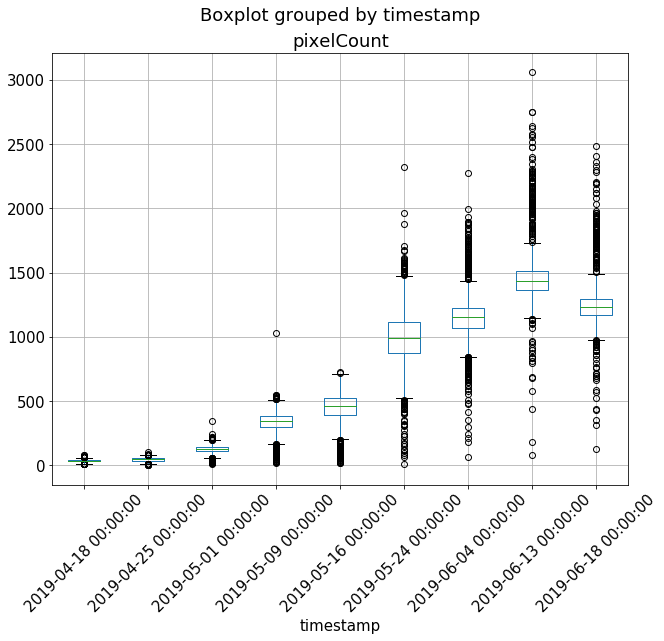

In [3]:
# Schriftgrösse für Plots definieren
plt.rcParams.update({'font.size': 15})

# Boxplot der Pixelanzahl gruppiert nach Datum
broccoli_data.boxplot(by="timestamp", column=['pixelCount'], figsize=(10,8))
plt.xticks(rotation=45)

### Zwischenfazit Pixel-Anzahl Boxplot
Es ist komisch, dass vom 13.06.19 auf den 18.06.19 der pixelCount niedriger wird.<br>
ToDo: Die Segmentierung muss geprüft und allenfalls überarbeitet werden.

In [4]:
# Analyse pixelCount: Datensätze in Bereich ausserhalb bestimmter Quantile analysieren
# Erstellung von CSV und HTML Export zur manuellen Analyse und Erstellung eine Blacklist mit inkorrekt segmentierten Datensätzen

pixelCountNotable = pd.DataFrame()
for date in dates:    
    # Listen mit Pflanzen mit pixelCount > [quantile_Lower]-Quantil bzw. < [quantile_Upper]-Quantil erstellen
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    
    quantile_Lower = 0.03
    quantile_Upper = 0.97
    
    underLowerQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount < 
                                        broccoli_data_byDate['pixelCount'].quantile(quantile_Lower)][['id', 'pixelCount']]
    overUpperQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount > 
                                       broccoli_data_byDate['pixelCount'].quantile(quantile_Upper)][['id', 'pixelCount']]
    
    # Liste aller gefilterter IDs nach Datum erstellen
    underLowerQuant[date + "_Under"] = 1
    overUpperQuant[date + "_Over"] = 1
    underLowerQuant.set_index('id', inplace=True)
    overUpperQuant.set_index('id', inplace=True)
    pixelCountNotable = pd.concat([pixelCountNotable, underLowerQuant[date + "_Under"]], axis=1)
    pixelCountNotable = pd.concat([pixelCountNotable, overUpperQuant[date + "_Over"]], axis=1)    
    underLowerQuant.drop([date + "_Under"], axis=1, inplace=True)
    overUpperQuant.drop([date + "_Over"], axis=1, inplace=True)
    underLowerQuant.reset_index(inplace=True)
    overUpperQuant.reset_index(inplace=True)
    
    # CSV mit IDs der Pflanzen mit pixelCount < [quantile_Lower]-Quantil oder > [quantile_Upper]-Quantil erstellen
    underLowerQuant['toBlacklist']= 0
    overUpperQuant['toBlacklist']= 0
    np.savetxt("pixelCount_notableIDs_" + date + ".csv", pd.concat([underLowerQuant, overUpperQuant]), 
               header="id;pixelCount;toBlacklist", delimiter=";", fmt="%d", comments='')    
    
    # HTML mit den Segmentierungs-Bildern erstellen
    strHtml = ""
    for index, row in pd.concat([underLowerQuant, overUpperQuant]).iterrows():
        strId = str(row["id"])
        strHtml += "<p>#" + strId + " ; pixelCount = " + str(row["pixelCount"]) + "</p>\n"
        strHtml += "<img src=\"\\\\fs004\\ice\\Lehre\\Bachelorarbeiten\\2019\\Pflanzen\\Drohnenaufnahmen\\" \
        + (str(date)).replace('-', '') + "\\report\\images\\" + strId + "\\ndvi_ndre_cutout_comparision_" + strId + ".png\">\n"
       
    
    html = open("pixelCount_NotableImages_" + date + ".html", 'w')
    html.write(strHtml)
    html.close()
    
    # Ausgabe der Anzahlen
    nofUnderLowerQuant = len(underLowerQuant)
    nofOverUpperQuant = len(overUpperQuant)
    
    print(date + ":: <" + str(quantile_Lower*100) + "%; " + str(nofUnderLowerQuant) + " | >" + str(quantile_Upper*100) + "%; "
          + str(nofOverUpperQuant))
    
# Ausgabe Liste aller gefilterter IDs nach Datum
pixelCountNotable.fillna(value=0, inplace=True)
pixelCountNotable.to_csv("pixelCount_Notable_PerDate.csv", sep=';')

2019-04-18:: <3.0%; 73 | >97.0%; 69
2019-04-25:: <3.0%; 71 | >97.0%; 76
2019-05-01:: <3.0%; 75 | >97.0%; 77
2019-05-09:: <3.0%; 77 | >97.0%; 74
2019-05-16:: <3.0%; 77 | >97.0%; 77
2019-05-24:: <3.0%; 76 | >97.0%; 76
2019-06-04:: <3.0%; 77 | >97.0%; 77
2019-06-13:: <3.0%; 77 | >97.0%; 77
2019-06-18:: <3.0%; 77 | >97.0%; 76


### Zwischenfazit pixelCount, Stand 21.05.2019
Da im Boxplot ersichtlich ist, dass es einige Ausreisser gibt, werden die Datensätze mit pixelCount ausserhalb der 2%- bzw. 98%-Quantile genauer untersucht (Muss allenfalls auf z.B. 5%, 95% ausgeweitet werden). Dazu werden je Datum eine CSV- und eine HTML-Datei erstellt, mit den IDs, dem pixelCount und den Vergleichsbildern der Segmentierung (im HTML). Diese müssen manuell kontrolliert werden, danach können Datensätze entweder gelöscht oder angepasst werden.
Im Vergleich zu den alten Daten (nicht mehr ersichtlich da überschrieben), gibt es aber vorallem nach oben, über der 75%-Quantils-Grenze, weniger krasse Ausreisser.

## Analyse der NDVI und NDRE Messwerte
Im Folgenden werden die aggregierten NDVI und NDRE Werte der segmentierten Bilder analysiert. Es werden Ausreisser und auffällige Messwerte gesucht, zeitliche Verläufe der Werte, und Abhängigkeiten zwischen den Indizes. Ein Plot mit y-Achse = NDRE und x-Achse = NDVI würde die Grundlage für die Berechnung des CCCI bilden.

## NDVI

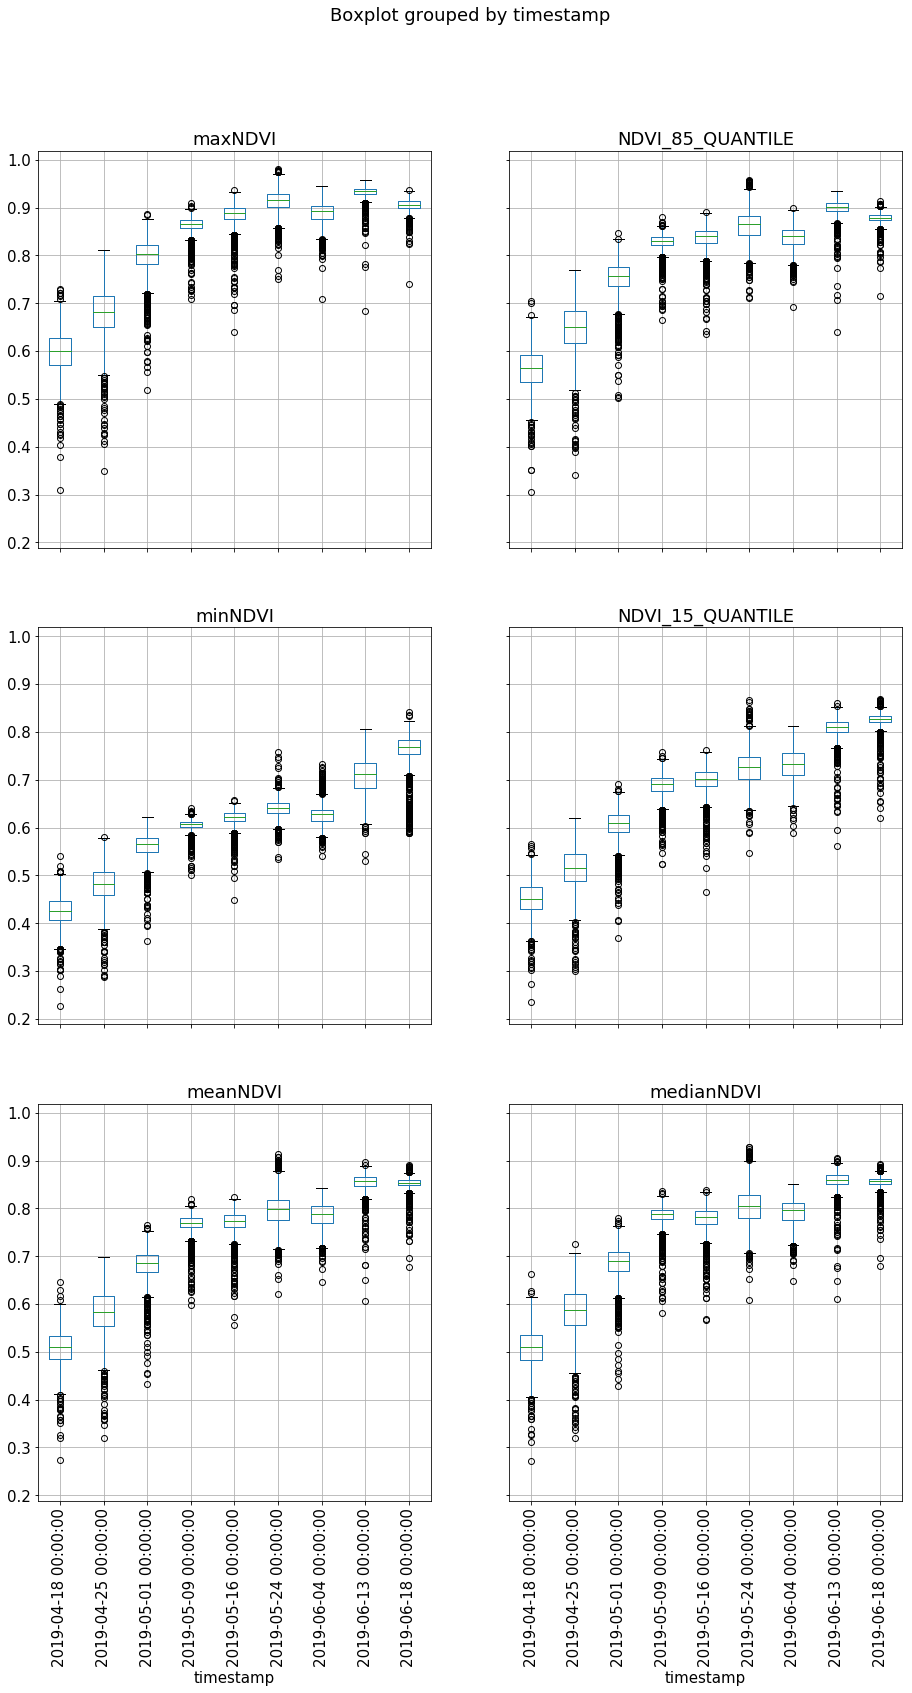

In [5]:
# Boxplot der NDVI-Werte gruppiert nach Datum
columns = ['maxNDVI', 'NDVI_85_QUANTILE', 'minNDVI', 'NDVI_15_QUANTILE', 'meanNDVI', 'medianNDVI']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDVI, Stand 21.05.2019
Es ist ersichtlich, dass die NDVI-Werte mit der Zeit im Mittel tendenziell steigen.
Statt der Max-/Min-Werte sollten eher die 15%-/85%-Quantile verwenedet werden, um Ausreisser zu vermeiden. Es ist jedoch ersichtlich, dass diese ähnlich oder fast stärker streuen als die Max-/Min-Werte. 

## NDRE

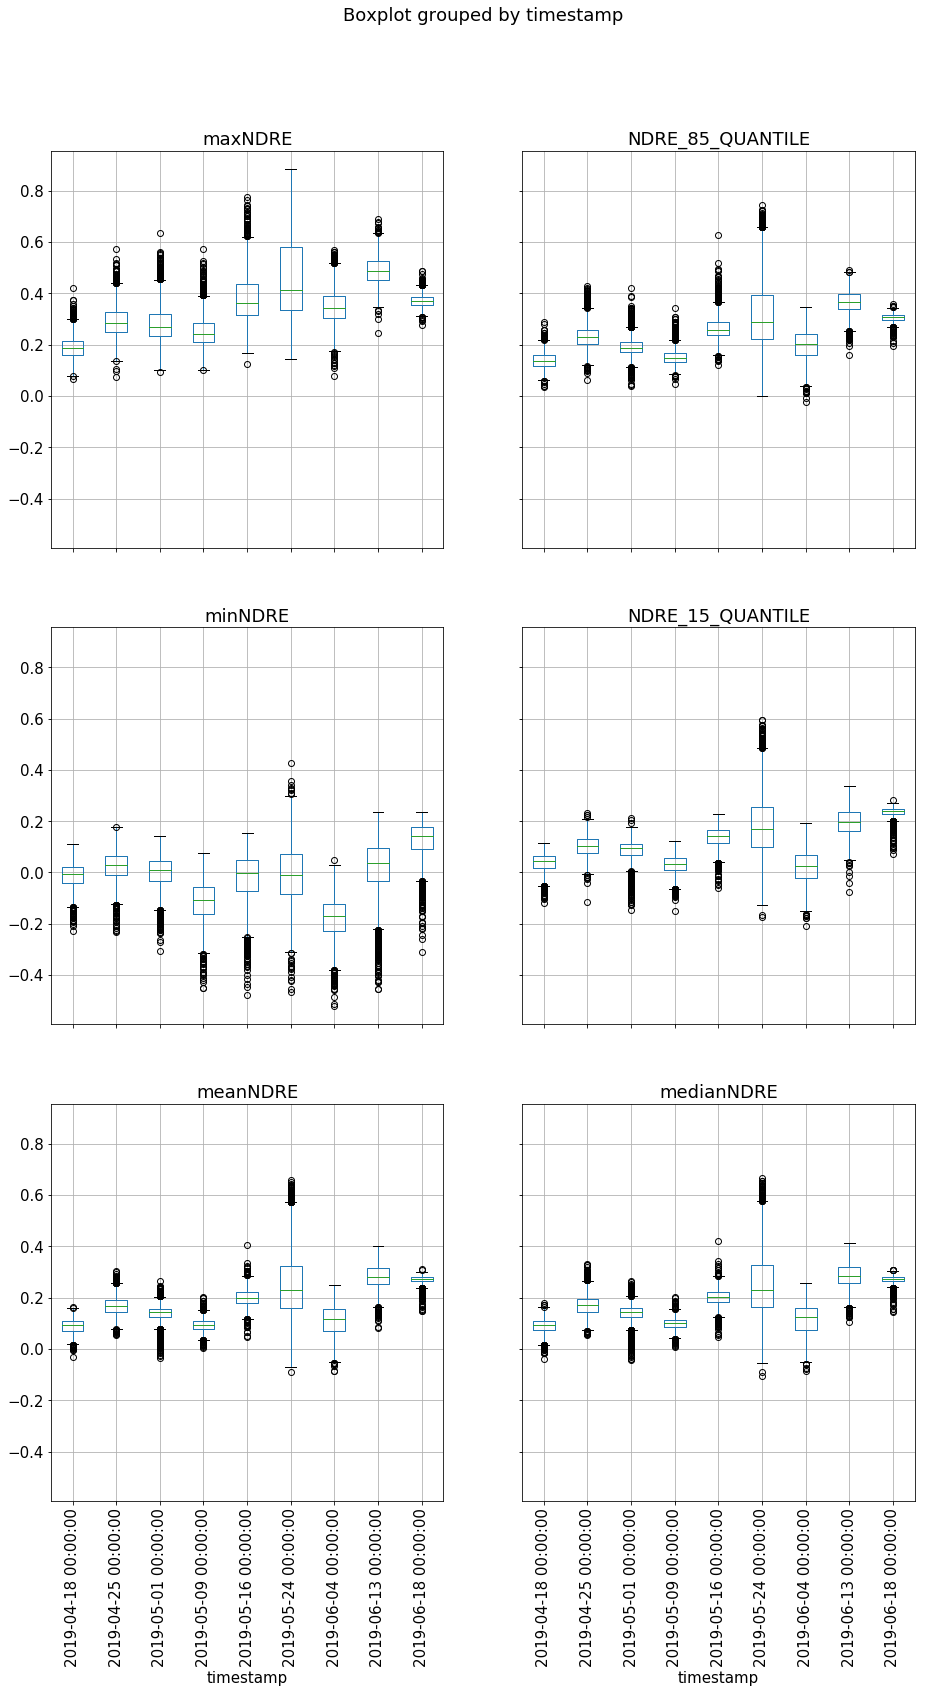

In [6]:
# Boxplot der NDRE-Werte gruppiert nach Datum
columns = ['maxNDRE', 'NDRE_85_QUANTILE', 'minNDRE', 'NDRE_15_QUANTILE', 'meanNDRE', 'medianNDRE']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDRE, Stand 21.05.2019
Bei dem NDRE-Messwerten ist ersichtlich, dass die Streuung um den Mittelwert bei den 15%-/85%-Quantilen kleiner ist als bei den Min-/Max-Werten. zudem steigen die NDRE Messwerte nicht kontinuierlich, sondern fallen und steigen wieder. Dass die unteren und oberen Werten ähnlich fallen und steigen, lässt auf eine gewisse Konsistenz in der Datenerfassung schliessen.

## Plot NDVI/NDRE
Für die allfällige Berechnung des CCCI ist ein Scatterplot mit x-Achse = NDVI und y-Achse = NDRE die Voraussetzung. Im Folgenden wird dieser mit den 85%-Quantilen und mit den Mittelwerten der Datensätze erstellt.

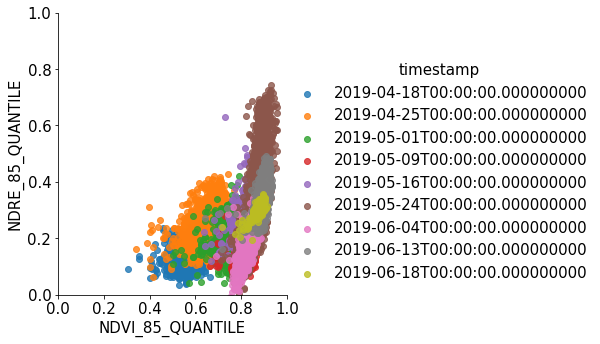

In [7]:
import seaborn as sns 
sns.lmplot(x='NDVI_85_QUANTILE', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.show()

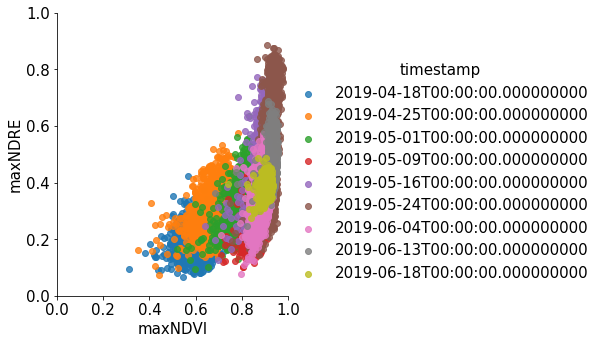

In [8]:
sns.lmplot(x='maxNDVI', y='maxNDRE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.show()

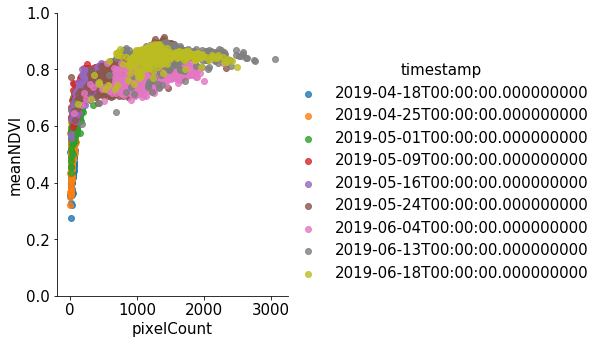

In [9]:
sns.lmplot(x='pixelCount', y='meanNDVI', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

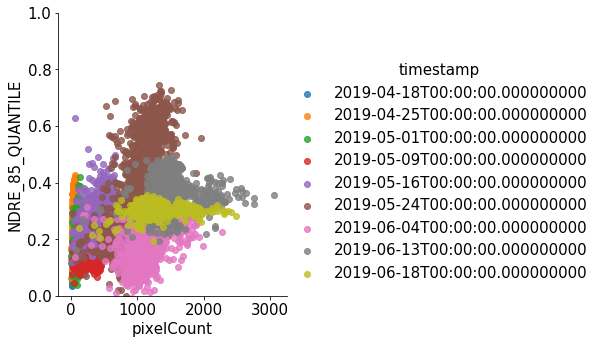

In [10]:
sns.lmplot(x='pixelCount', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

### Zwischenfazit NDVI/NDRE, Stand 21.05.2019
Wie in den Scatterplots ersichtlich ist, sind die Datenwolken nach Datum einigermassen örtlich gruppiert. Dabei treten jedoch sehr verschiedene NDRE-Werte pro Datum und auch NDVI-Wert auf. Eine lineare Beziehung NDVI->NDRE, wie sie in der Literatur (vergleiche Fachmodul) gezeigt wurde, ist nicht wirklich sichtbar. Die Berechnung des CCCI anhand dieser Daten ist momentan noch nicht vielversprechend, könnte jedoch gewagt werden. Abzuwarten ist, ob die NDRE-Werte mit der Zeit noch ansteigen, da sie mittlerweile eher tiefe Werte annehmen.

## Analyse der Erntedaten
In diesem Schritt werden die Erntedaten, dass heisst Gewicht und Zustand, in Zusammenhang mit den Messdaten (Vegetationsindizes, Wetterdaten) untersucht.<br>
Versucht wird eine Korrelation zwischen den Indizes oder dem Wetter und dem Erntegewicht zu finden. Das Erntegewicht ist hauptsächlich die Response eines potentiellen ML-Modelles, wobei auch noch der Zustand berücksichtigt werden kann. Zustände sind:<br>
* Fehlt: Brokkoli wurde bei der Ernte nicht gefunden
* Überreif
* Verkümmert: Pflanze ist fast gar nicht gewachsen und hat kleine Blätter
* Kein Kopf: Pflanze hat zwar grosse Blätter aber keinen 'Kopf' bzw. keine Blüte
* Faul
* Unreif (alle Brokkoli unter 300g)

### Korrelationen zwischen Vegetationsindizes, Pixel-Anzahl und Erntegewicht
In einem ersten Schritt wird durch verschiedene Plots versucht, eine erhoffte Korrelation der Vegetationsindizes oder der Pixel-Anzahl (gemäss Segmentierung) und dem Erntegewicht zu finden.

#### Untersuchung letzte Messung - Unverrechnete Werte
Da die Pflanzen bei der letzten Messung am 18.06.19, am Tag vor der Ernte, am weitesten entwickelt waren, wird zuerst diese Messung mit den Erntedaten verglichen.

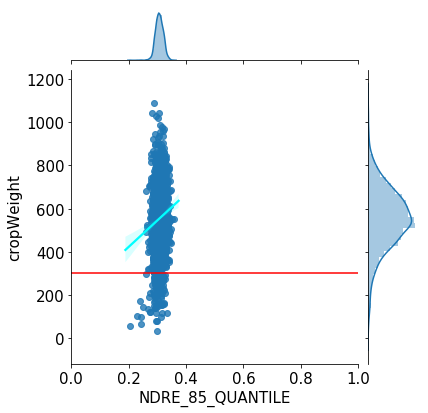

In [11]:
# Daten mit den Messwerten der letzen Messung filtern
broccoli_data_lastDate = broccoli_data[broccoli_data.timestamp == '2019-06-18']

# Scatterplot NDRE 85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie, welche das Minimalgewicht für Reife darstellt
plt.axhline(y=300, color='red')

# Skala NDRE auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

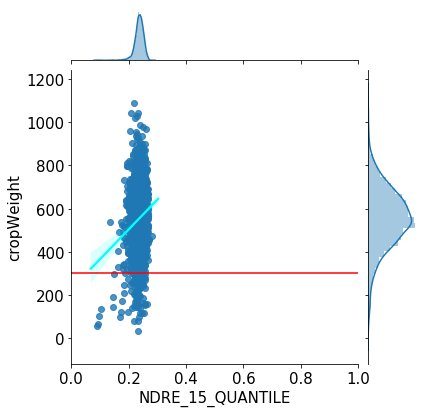

In [12]:
# Scatterplot NDRE 15%-Quantil - Gewicht
sns.jointplot(x='NDRE_15_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie, welche das Minimalgewicht für Reife darstellt
plt.axhline(y=300, color='red')

# Skala NDRE auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

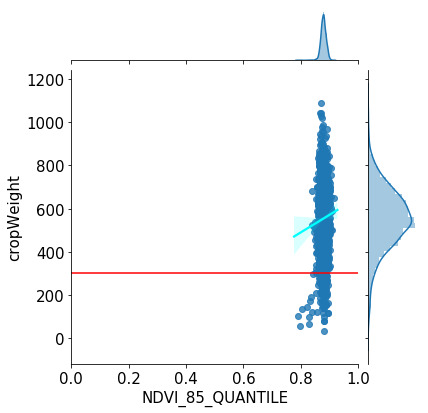

In [13]:
# Scatterplot NDVI 85%-Quantil - Gewicht
sns.jointplot(x='NDVI_85_QUANTILE', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')

# Skala NDVI auf [0,1] setzen
axes = plt.gca()
axes.set_xlim([0,1])
plt.show()

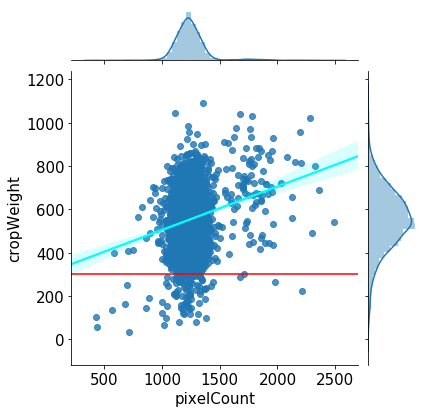

In [14]:
# Scatterplot Pixel-Anzahl - Erntegewicht
sns.jointplot(x='pixelCount', y='cropWeight', data=broccoli_data_lastDate, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

#### Untersuchung verrechnete Werte
Da keine ersichtliche Korrelation zwischen NDVI/NDRE/Pixel-Anzahl und Gewicht gefunden wurde, werden in diesem Schritt bestimmte Werte berechnet, die nicht nur Messwerte an einem Datum darstellen. Das kann beispielsweise die Summe des durchschnittlichen NDVI über alle Messdaten sein.

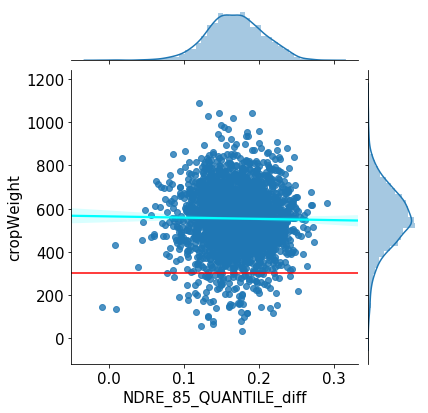

In [15]:
# Erstellung eines DataFrames zur Untersuchung der Erntedaten mit verrechneten Werten
# broccoli_data_lastDate beinhaltet zu jedem Brokkoli nur ein Datum, das DataFrame enthält zu Beginn nur Brokkoli-IDs 
# und deren Gewicht
broccoli_cropData = broccoli_data_lastDate[['id', 'cropWeight','cropMissing', 'cropOverripe', 'cropRudimentary', 'cropRotten',
                                            'cropUnripe', 'cropNoBlossom', 'rowNumber', 'NDRE_85_QUANTILE', 
                                            'NDVI_85_QUANTILE']].copy()
broccoli_cropData.rename(index=str, columns={"NDRE_85_QUANTILE": "NDRE_85_QUANTILE_lastDate", "NDVI_85_QUANTILE":
                                             "NDVI_85_QUANTILE_lastDate"}, inplace=True)


# Berechnung der Differenz des NDRE-85%-Quantils zwischen dem letzen und dem ersten Messdatum für jeden Brokkoli
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-06-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id')
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-04-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id', suffixes=('_0618', '_0418'))
broccoli_cropData['NDRE_85_QUANTILE_diff'] = (broccoli_cropData['NDRE_85_QUANTILE_0618'] - 
                                              broccoli_cropData['NDRE_85_QUANTILE_0418'])
broccoli_cropData.drop(['NDRE_85_QUANTILE_0618', 'NDRE_85_QUANTILE_0418'], axis=1, inplace=True)

# Scatterplot Differenz NDRE-85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE_diff', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

In [16]:
# Berechnung der Summen aller Messwerte für jeden Brokkoli
broccoli_cropData = broccoli_cropData.merge(broccoli_data.drop(['lat', 'long', 'cropWeight', 'cropMissing', 'cropOverripe'
                                                               , 'cropRudimentary', 'cropRotten', 'cropUnripe','cropNoBlossom', 'rowNumber'],
                                                               axis=1).groupby(['id']).sum().add_suffix('_sum'), left_on='id',
                                            right_on='id')
broccoli_cropData.head()

id  cropWeight  cropMissing  cropOverripe  cropRudimentary  cropRotten  \
0   1         NaN            0             0                1           0   
1   2         NaN            0             0                0           0   
2   3         NaN            0             0                0           1   
3   4       504.0            0             0                0           0   
4   5       171.0            0             0                0           0   

   cropUnripe  cropNoBlossom  rowNumber  NDRE_85_QUANTILE_lastDate  ...  \
0           0              0          2                   0.234960  ...   
1           1              0          1                   0.244244  ...   
2           0              0          2                   0.249088  ...   
3           0              0          1                   0.275040  ...   
4           1              0          2                   0.237895  ...   

   NDVI_75_QUANTILE_sum  NDVI_85_QUANTILE_sum  maxNDRE_sum  minNDRE_sum  \
0              6.024333              6.165614     2.060165    -0.168202   
1              6.491165              6.653173     2.445816    -0.052966   
2              6.739554              6.882051     2.168607     0.203520   
3              6.979826              7.110945     2.551223     0.005736   
4              6.792361              6.959349     2.484260    -0.296113   

   meanNDRE_sum  medianNDRE_sum  NDRE_15_QUANTILE_sum  NDRE_25_QUANTILE_sum  \
0      1.104626        1.128657              0.594031              0.796224   
1      1.179873        1.207083              0.666648              0.852718   
2      1.344681        1.385629              0.980094              1.109133   
3      1.421292        1.403219              0.975019              1.103663   
4      1.278361        1.295557              0.787031              0.993728   

   NDRE_75_QUANTILE_sum  NDRE_85_QUANTILE_sum  
0              1.456158              1.586233  
1              1.502430              1.675670  
2              1.597043              1.707438  
3              1.738070              1.903032  
4              1.610418              1.759785  

[5 rows x 29 columns]

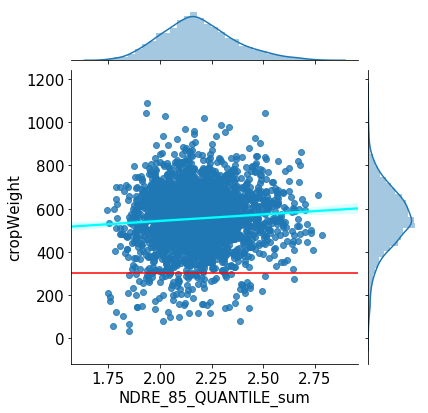

In [17]:
# Scatterplot Summe NDRE-85%-Quantil - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE_sum', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

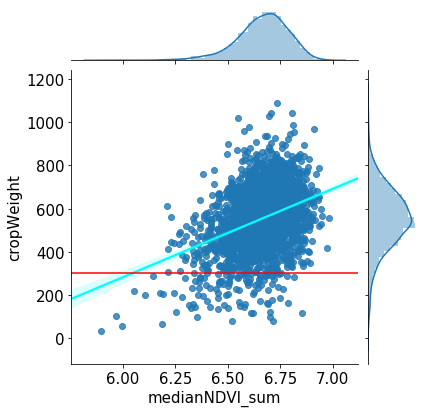

In [18]:
# Scatterplot Summe Median-NDVI - Gewicht
sns.jointplot(x='medianNDVI_sum', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Erntegewicht
plt.axhline(y=300, color='red')
plt.show()

In [19]:
# Berechnung der Integrale des Median-NDVI, Median-NDRE
# x-Achse für Integration ist die Anzahl Tage seit erstem Messtag (Erster Messtag = 0) 
from scipy import integrate

# Hinzufügen der Spalten mit Initialwert 0.0
broccoli_cropData['medianNDVI_Integral'] = 0.0
broccoli_cropData['NDRE_85_QUANTILE_Integral'] = 0.0
broccoli_cropData['pixelCount_Integral'] = 0.0

# x-Werte für Integration (Tage seit erstem Messdatum)
x = [0, 7, 13, 21, 28, 36, 47, 56, 62]

# Berechnung der Integrale für jeden Brokkoli
for index, row in broccoli_cropData.iterrows():
    #if(len(broccoli_data[broccoli_data.id==row['id']]['medianNDVI'].to_numpy()) == 9):
    broccoli_cropData.at[index, 'medianNDVI_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['medianNDVI'].to_numpy(), x=x, initial=0)[8]
    broccoli_cropData.at[index, 'NDRE_85_QUANTILE_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['NDRE_85_QUANTILE'].to_numpy(), x=x, initial=0)[8]
    broccoli_cropData.at[index, 'pixelCount_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['pixelCount'].to_numpy(), x=x, initial=0)[8]

broccoli_cropData.head()

id  cropWeight  cropMissing  cropOverripe  cropRudimentary  cropRotten  \
0   1         NaN            0             0                1           0   
1   2         NaN            0             0                0           0   
2   3         NaN            0             0                0           1   
3   4       504.0            0             0                0           0   
4   5       171.0            0             0                0           0   

   cropUnripe  cropNoBlossom  rowNumber  NDRE_85_QUANTILE_lastDate  ...  \
0           0              0          2                   0.234960  ...   
1           1              0          1                   0.244244  ...   
2           0              0          2                   0.249088  ...   
3           0              0          1                   0.275040  ...   
4           1              0          2                   0.237895  ...   

   minNDRE_sum  meanNDRE_sum  medianNDRE_sum  NDRE_15_QUANTILE_sum  \
0    -0.168202      1.104626        1.128657              0.594031   
1    -0.052966      1.179873        1.207083              0.666648   
2     0.203520      1.344681        1.385629              0.980094   
3     0.005736      1.421292        1.403219              0.975019   
4    -0.296113      1.278361        1.295557              0.787031   

   NDRE_25_QUANTILE_sum  NDRE_75_QUANTILE_sum  NDRE_85_QUANTILE_sum  \
0              0.796224              1.456158              1.586233   
1              0.852718              1.502430              1.675670   
2              1.109133              1.597043              1.707438   
3              1.103663              1.738070              1.903032   
4              0.993728              1.610418              1.759785   

   medianNDVI_Integral  NDRE_85_QUANTILE_Integral  pixelCount_Integral  
0            39.498240                  10.684296              11973.5  
1            42.754094                  11.428876              22663.5  
2            44.884187                  11.825574              15727.5  
3            46.415482                  12.990398              36590.5  
4            45.025790                  12.283664              26249.5  

[5 rows x 32 columns]

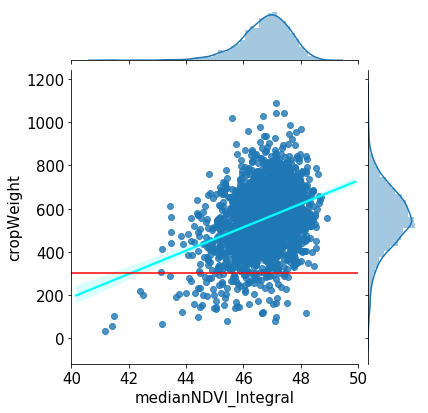

In [20]:
# Scatterplot Integral Median-NDVI - Gewicht
sns.jointplot(x='medianNDVI_Integral', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Skala Integral NDVI auf [40,50] setzen
axes = plt.gca()
axes.set_xlim([40,50])

# Horizontale Line für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

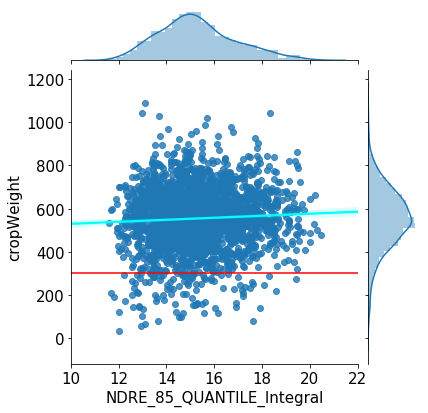

In [21]:
# Scatterplot Integral Median-NDRE - Gewicht
sns.jointplot(x='NDRE_85_QUANTILE_Integral', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Skala Integral NDRE auf 6,16] setzen
axes = plt.gca()
#axes.set_xlim([6,16])

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

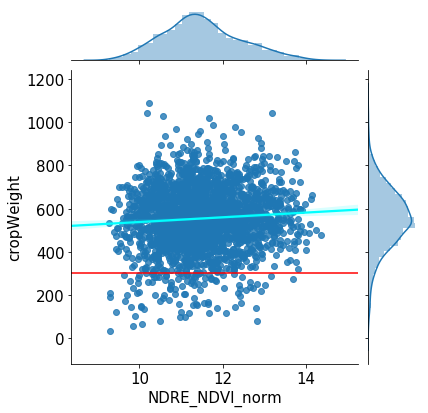

In [22]:
# Verrechnung NDVI/NDRE Integrale
broccoli_cropData['NDRE_NDVI_norm'] = ((broccoli_cropData['NDRE_85_QUANTILE_Integral'] * broccoli_cropData['medianNDVI_Integral'])
                                       / (broccoli_cropData['NDRE_85_QUANTILE_Integral'] + broccoli_cropData['medianNDVI_Integral']))

# Scatterplot Verrechnung NDVI/NDRE Integrale - Gewicht
sns.jointplot(x='NDRE_NDVI_norm', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()


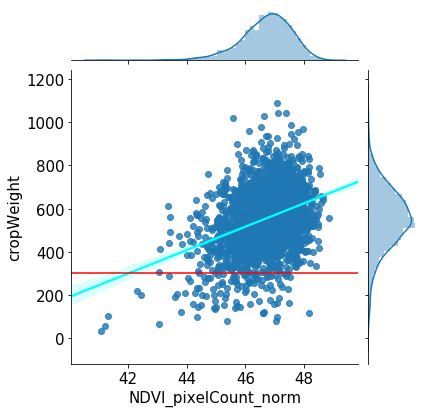

In [23]:
# Verrechnung NDVI/Pixel-Anzahl
broccoli_cropData['NDVI_pixelCount_norm'] = ((broccoli_cropData['pixelCount_Integral'] * broccoli_cropData['medianNDVI_Integral'])
                                       / (broccoli_cropData['pixelCount_Integral'] + broccoli_cropData['medianNDVI_Integral']))

# Scatterplot Verrechnung NDVI/Pixel-Anzahl - Gewicht
sns.jointplot(x='NDVI_pixelCount_norm', y='cropWeight', data=broccoli_cropData, kind='reg',
             joint_kws={'line_kws':{'color':'cyan'}})

# Horizontale Linie für minimales Reifegewicht
plt.axhline(y=300, color='red')
plt.show()

## Verteilung aller NDVI, NDRE und pixelCount Werten der Brokkoli über den gesamten Zeitraum

In [24]:
mean_ndvi_lineplot_ts = pd.DataFrame({'timestamp' : dates})
mean_ndre_lineplot_ts = pd.DataFrame({'timestamp' : dates})
pixelCount_lineplot_ts = pd.DataFrame({'timestamp' : dates})
median_ndvi_lineplot_ts = pd.DataFrame({'timestamp' : dates})
median_ndre_lineplot_ts = pd.DataFrame({'timestamp' : dates})
unique_id = broccoli_data.id.unique()
values_id = np.array([])
values_cropWeight = np.array([])
for index in unique_id:
    values_ndvi = np.array([])
    values_ndre = np.array([])
    values_pixelCount = np.array([])
    values_ndvi_median = np.array([])
    values_ndre_median = np.array([])
    for date in dates:
        values_ndvi = np.append(values_ndvi, broccoli_data[(broccoli_data['id'] == index) & (broccoli_data['timestamp'] == date)]['meanNDVI'])
        values_ndre = np.append(values_ndre, broccoli_data[(broccoli_data['id'] == index) & (broccoli_data['timestamp'] == date)]['meanNDRE'])
        values_pixelCount = np.append(values_pixelCount, broccoli_data[(broccoli_data['id'] == index) & (broccoli_data['timestamp'] == date)]['pixelCount'])
        values_ndvi_median = np.append(values_ndvi_median, broccoli_data[(broccoli_data['id'] == index) & (broccoli_data['timestamp'] == date)]['medianNDVI'])
        values_ndre_median = np.append(values_ndre_median, broccoli_data[(broccoli_data['id'] == index) & (broccoli_data['timestamp'] == date)]['medianNDRE'])
    if len(values_ndvi) < 9:
        continue
    values_id = np.append(values_id, index)
    mean_ndvi_lineplot_ts[str(index)] = values_ndvi
    mean_ndre_lineplot_ts[str(index)] = values_ndre
    pixelCount_lineplot_ts[str(index)] = values_pixelCount
    median_ndvi_lineplot_ts[str(index)] = values_ndvi_median
    median_ndre_lineplot_ts[str(index)] = values_ndre_median

id_cropWeight_Df = pd.DataFrame({'id': values_id})
    
mean_ndvi_lineplot_ts['timestamp'] = pd.to_datetime(mean_ndvi_lineplot_ts['timestamp'])
mean_ndvi_lineplot_ts.set_index("timestamp", drop=True, inplace=True)

mean_ndre_lineplot_ts['timestamp'] = pd.to_datetime(mean_ndre_lineplot_ts['timestamp'])
mean_ndre_lineplot_ts.set_index("timestamp", drop=True, inplace=True)

pixelCount_lineplot_ts['timestamp'] = pd.to_datetime(pixelCount_lineplot_ts['timestamp'])
pixelCount_lineplot_ts.set_index("timestamp", drop=True, inplace=True)

median_ndvi_lineplot_ts['timestamp'] = pd.to_datetime(median_ndvi_lineplot_ts['timestamp'])
median_ndvi_lineplot_ts.set_index("timestamp", drop=True, inplace=True)

median_ndre_lineplot_ts['timestamp'] = pd.to_datetime(median_ndre_lineplot_ts['timestamp'])
median_ndre_lineplot_ts.set_index("timestamp", drop=True, inplace=True)


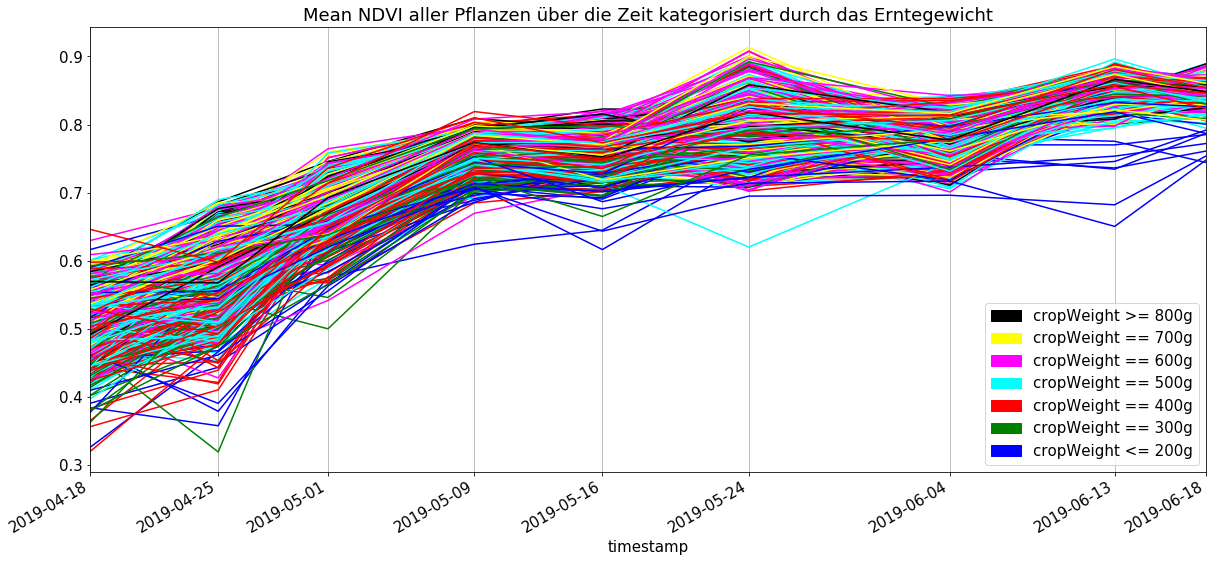

In [25]:
# Die Farben vorbereiten
import matplotlib.patches as mpatches
colors = {'200': 'blue', '300': 'green', '400': 'red', '500': 'cyan', '600': 'magenta', '700': 'yellow', '800': 'black'}
blue_patch = mpatches.Patch(color='blue', label='cropWeight <= 200g')
green_patch = mpatches.Patch(color='green', label='cropWeight == 300g')
red_patch = mpatches.Patch(color='red', label='cropWeight == 400g')
cyan_patch = mpatches.Patch(color='cyan', label='cropWeight == 500g')
magenta_patch = mpatches.Patch(color='magenta', label='cropWeight == 600g')
yellow_patch = mpatches.Patch(color='yellow', label='cropWeight == 700g')
black_patch = mpatches.Patch(color='black', label='cropWeight >= 800g')
patches=[black_patch, yellow_patch, magenta_patch, cyan_patch, red_patch, green_patch, blue_patch]

broccoli_data_without_nan = broccoli_data[broccoli_data['cropWeight'].isnull() == False]

fig = plt.figure(figsize=(20,20))
fig.add_subplot(211)
ax1 = fig.gca()
ax1.set_title("Mean NDVI aller Pflanzen über die Zeit kategorisiert durch das Erntegewicht")
ax1.legend(handles=patches)

for broccoli_id, values in mean_ndvi_lineplot_ts.iteritems():
    cropWeight = broccoli_data_without_nan[(broccoli_data_without_nan['id'] == int(broccoli_id))]['cropWeight']
    if cropWeight.empty:
        continue
        
    cropWeight = cropWeight.iloc[0]
    roundedCropWeight = int(round(cropWeight,-2))
    if roundedCropWeight < 200:
          roundedCropWeight = 200
    if roundedCropWeight > 800:
          roundedCropWeight = 800
    color_plot = colors.get(str(roundedCropWeight))
    mean_ndvi_lineplot_ts[broccoli_id].plot(color=color_plot, ax=ax1)

plt.gca().set_xticks(dates)
plt.gca().xaxis.grid(True)
plt.show()

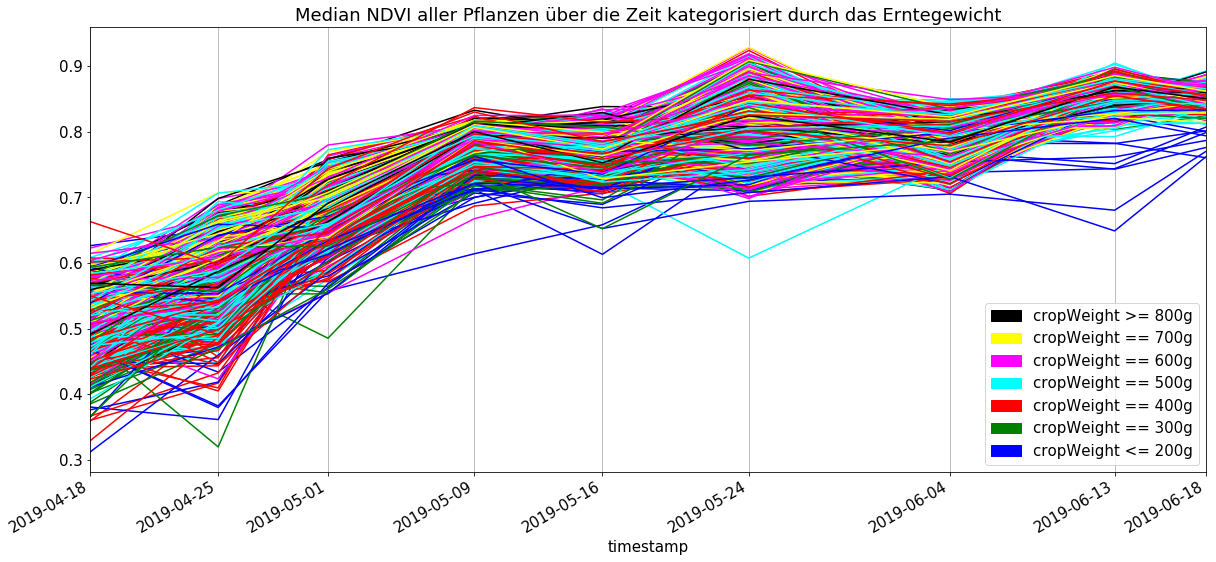

In [26]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(212)
ax2.set_title("Median NDVI aller Pflanzen über die Zeit kategorisiert durch das Erntegewicht")
ax2.legend(handles=patches)

for broccoli_id, values in median_ndvi_lineplot_ts.iteritems():
    cropWeight = broccoli_data_without_nan[(broccoli_data_without_nan['id'] == int(broccoli_id))]['cropWeight']
    if cropWeight.empty:
        continue
    cropWeight = cropWeight.iloc[0]
    roundedCropWeight = int(round(cropWeight,-2))
    if roundedCropWeight < 200:
          roundedCropWeight = 200
    if roundedCropWeight > 800:
          roundedCropWeight = 800
    color_plot = colors.get(str(roundedCropWeight))
    median_ndvi_lineplot_ts[broccoli_id].plot(color=color_plot, ax=ax2)
    
plt.gca().set_xticks(dates)
plt.gca().xaxis.grid(True)
plt.show()

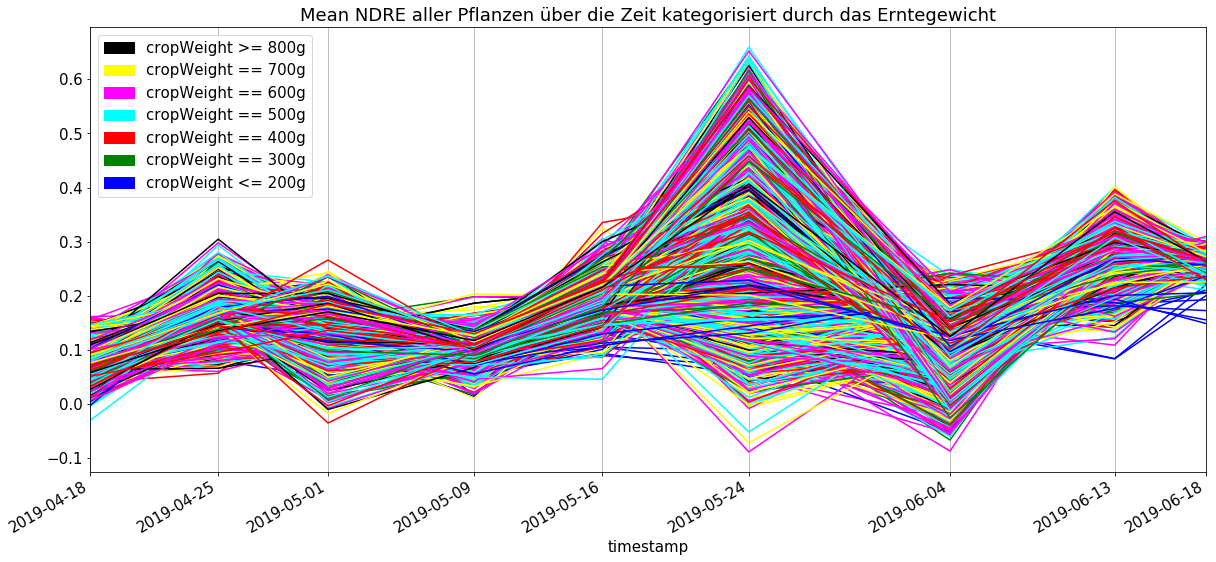

In [27]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
ax1.set_title("Mean NDRE aller Pflanzen über die Zeit kategorisiert durch das Erntegewicht")
ax1.legend(handles=patches)

for broccoli_id, values in mean_ndre_lineplot_ts.iteritems():
    cropWeight = broccoli_data_without_nan[(broccoli_data_without_nan['id'] == int(broccoli_id))]['cropWeight']
    if cropWeight.empty:
        continue
    cropWeight = cropWeight.iloc[0]
    roundedCropWeight = int(round(cropWeight,-2))
    if roundedCropWeight < 200:
          roundedCropWeight = 200
    if roundedCropWeight > 800:
          roundedCropWeight = 800
    color_plot = colors.get(str(roundedCropWeight))
    mean_ndre_lineplot_ts[broccoli_id].plot(color=color_plot, ax=ax1)
    
plt.gca().set_xticks(dates)
plt.gca().xaxis.grid(True)
plt.show()

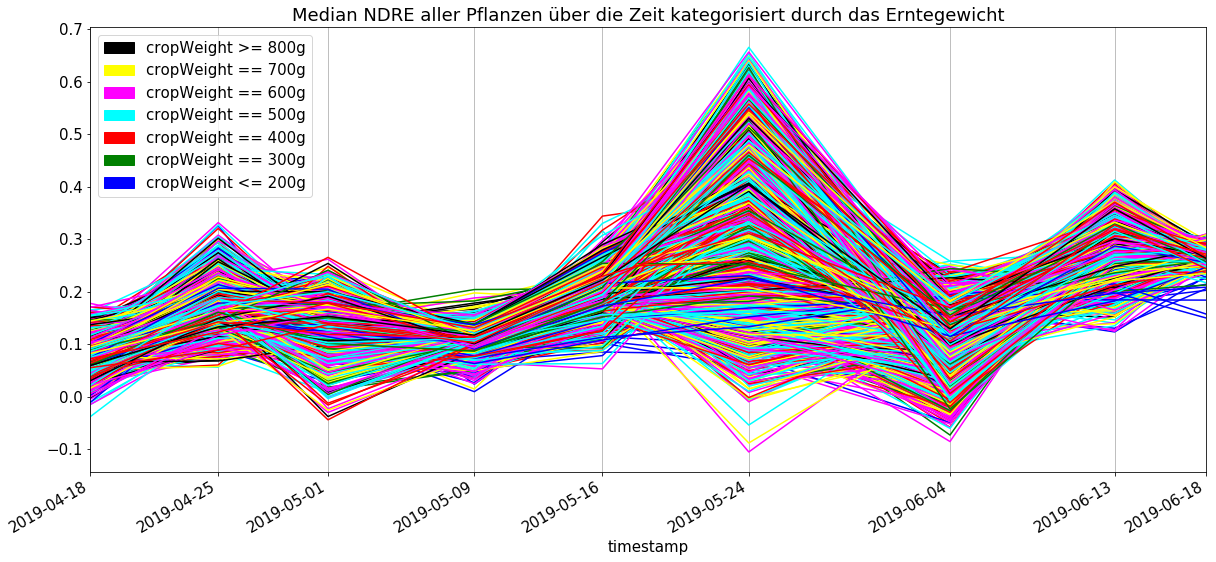

In [28]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(211)
ax2.set_title("Median NDRE aller Pflanzen über die Zeit kategorisiert durch das Erntegewicht")
ax2.legend(handles=patches)

for broccoli_id, values in median_ndre_lineplot_ts.iteritems():
    cropWeight = broccoli_data_without_nan[(broccoli_data_without_nan['id'] == int(broccoli_id))]['cropWeight']
    if cropWeight.empty:
        continue
    cropWeight = cropWeight.iloc[0]
    roundedCropWeight = int(round(cropWeight,-2))
    if roundedCropWeight < 200:
          roundedCropWeight = 200
    if roundedCropWeight > 800:
          roundedCropWeight = 800
    color_plot = colors.get(str(roundedCropWeight))
    median_ndre_lineplot_ts[broccoli_id].plot(color=color_plot, ax=ax2)
    
plt.gca().set_xticks(dates)
plt.gca().xaxis.grid(True)
plt.show()

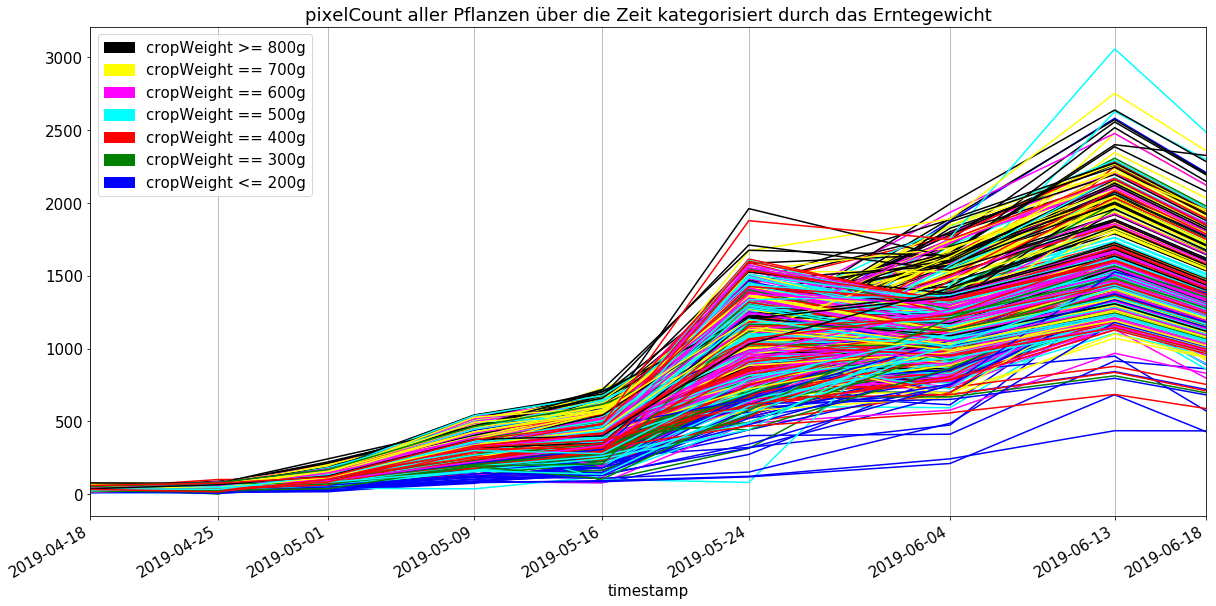

In [29]:
plt.figure(figsize=(20,10))
for broccoli_id, values in pixelCount_lineplot_ts.iteritems():
    cropWeight = broccoli_data_without_nan[(broccoli_data_without_nan['id'] == int(broccoli_id))]['cropWeight']
    if cropWeight.empty:
        continue
    cropWeight = cropWeight.iloc[0]
    roundedCropWeight = int(round(cropWeight,-2))
    if roundedCropWeight < 200:
          roundedCropWeight = 200
    if roundedCropWeight > 800:
          roundedCropWeight = 800
    color_plot = colors.get(str(roundedCropWeight))
    pixelCount_lineplot_ts[broccoli_id].plot(color=color_plot)
plt.title("pixelCount aller Pflanzen über die Zeit kategorisiert durch das Erntegewicht")
plt.legend(handles=patches)

plt.gca().set_xticks(dates)
plt.gca().xaxis.grid(True)
plt.show()

#### Analyse unreifer, schadhafter Brokkoli
Nun werden noch die unreifen und schadhaften (d.h. eines der Ernte Labels wurde gesetzt) untersucht. Allenfalls können Ausreisser bei der Pixel-Anzahl/NDVI/NDRE auf einen schadhaften Zustand bei der Ernte hinweisen.<br>
Wie oben erwähnt sind die Labels:<br>
* Fehlt: Brokkoli wurde bei der Ernte nicht gefunden
* Überreif
* Verkümmert: Pflanze ist fast gar nicht gewachsen und hat kleine Blätter
* Kein Kopf: Pflanze hat zwar grosse Blätter aber keinen 'Kopf' bzw. keine Blüte
* Faul
* Unreif (alle Brokkoli unter 300g)

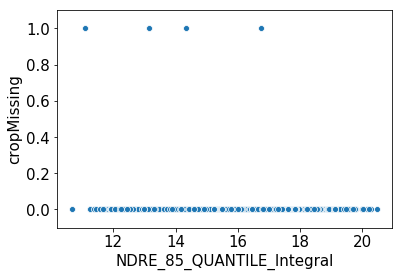

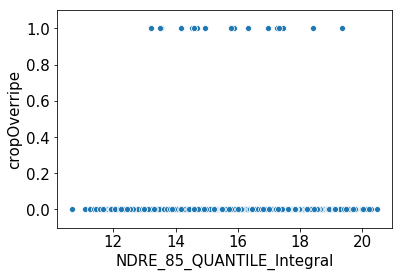

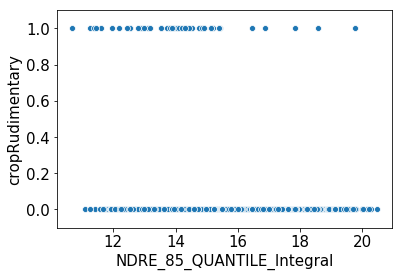

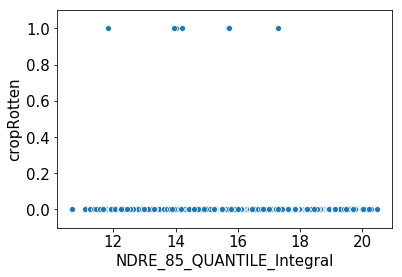

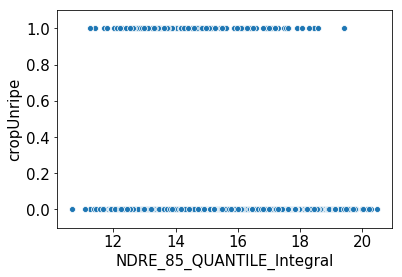

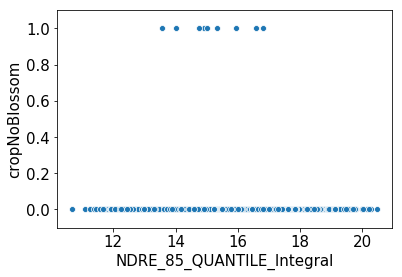

In [30]:
# Scatterplots Median-NDRE-Integral - Erntelabels
columnsCropLabels = ['cropMissing', 'cropOverripe', 'cropRudimentary', 'cropRotten', 'cropUnripe', 'cropNoBlossom']
for column in columnsCropLabels:    
    sns.scatterplot(x='NDRE_85_QUANTILE_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

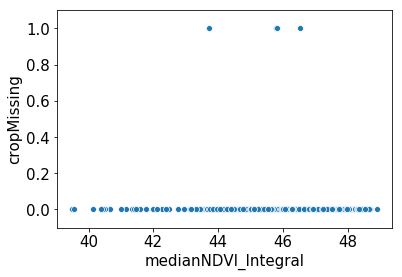

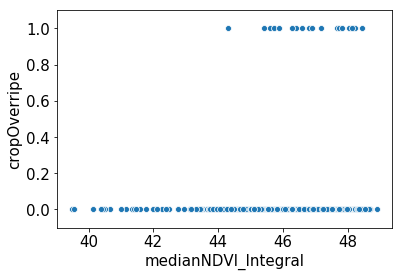

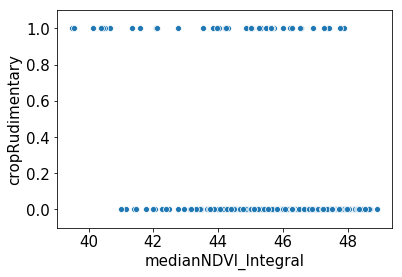

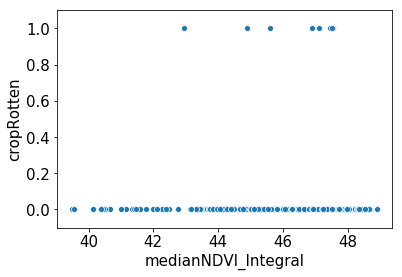

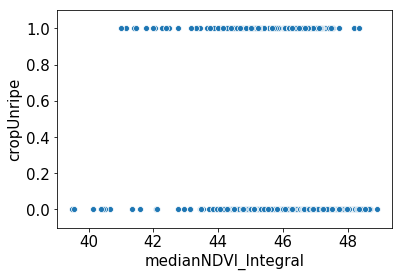

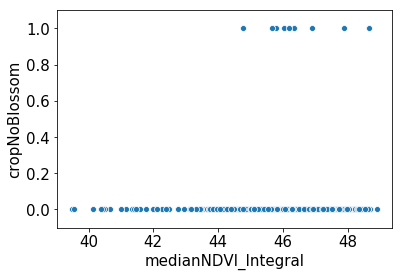

In [31]:
# Scatterplots Median-NDVI-Integral - Erntelabels
for column in columnsCropLabels:    
    sns.scatterplot(x='medianNDVI_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

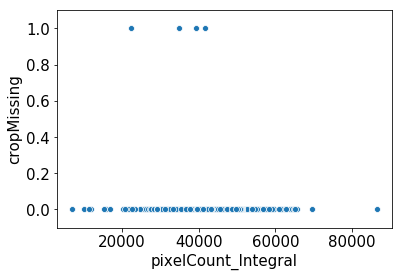

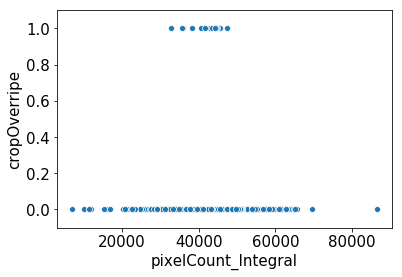

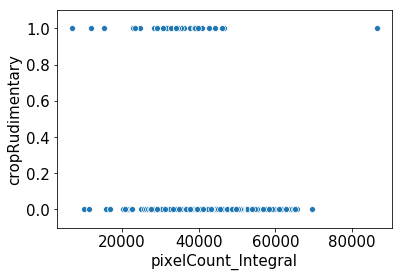

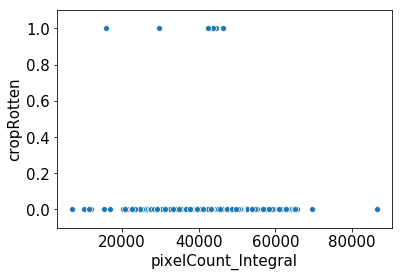

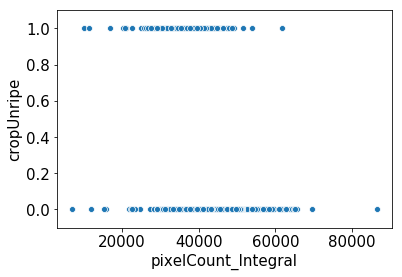

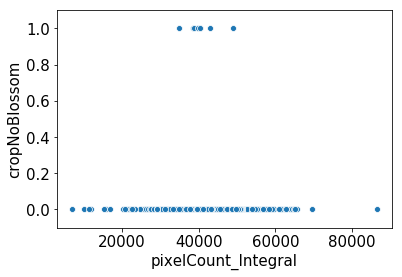

In [32]:
# Scatterplots Pixel-Anzahl-Integral - Erntelabels
for column in columnsCropLabels:    
    sns.scatterplot(x='pixelCount_Integral', y=column, data=broccoli_cropData)
    axes = plt.gca()
    axes.set_ylim([-0.1,1.1])    
    plt.show()

#### Korrelationsmatrix berrechnete Werte, Erntelabels
Um allfällige Korrelationen besser zu erkennen, wird im folgenden eine Korrelationsmatrix aufgrund des DataFrame mit den Erntelabels und den berechneten Werten erstellt.

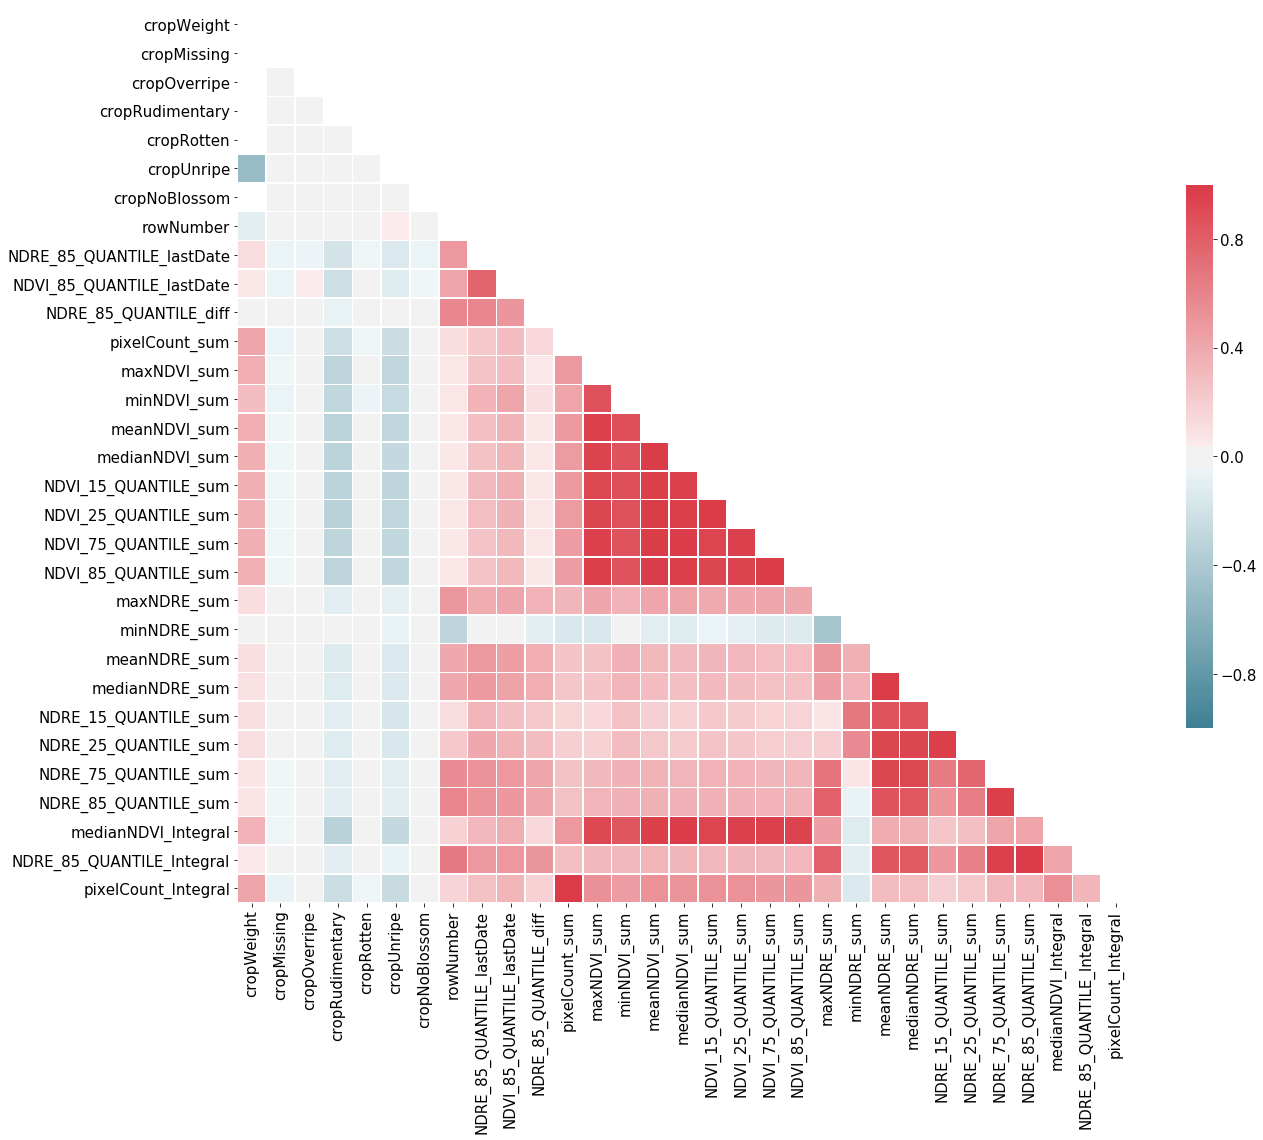

In [33]:
# Korrelationsmatrix erstellen
corr = broccoli_cropData.drop(['id', 'NDRE_NDVI_norm', 'NDVI_pixelCount_norm'], axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=False, vmin=-1, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})

#### Fazit Korrelationsmatrix berechnete Werte, Erntelabels
Die berechneten Werte korrelieren natürlich untereinander stark, dies führt jedoch zu keiner Aussage. Desweiteren sind keine sehr starken Korrelationen mit dem Gewicht / den Erntelabels und den Messwerten zu sehen. Weniger starke Korrelationen sind zu erkennen zwischen:<br>
* cropWeight (Gewicht) - pixelCount (Pixel-Anzahl)
* cropWeight (Gewicht) - (Berechnete) NDVI-Werte
* Negative Korrelation: cropRudimentary (Verkümmert) - (Berechnete) NDVI-Werte
* Negative Korrelation: cropUnripe (Unreif) - (Berechnete) NDVI-Werte

In [34]:
# Aufteilung der Daten in reife, unreife (Gewicht < 300g) Brokkoli
broccoli_data_lastDate_unripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight < 300]
broccoli_data_lastDate_ripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight >= 300]

print("Anzahl unreife Brokkoli (Gewicht < 300g): " + str(len(broccoli_data_lastDate_unripe)))
print("Durchschnitt meanNDVI unreife: " + str(broccoli_data_lastDate_unripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE unreife: " + str(broccoli_data_lastDate_unripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE unreife: " + str(broccoli_data_lastDate_unripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_15_QUANTILE'].mean()))
print()
print("Anzahl reife Brokkoli (Gewicht >= 300g): " + str(len(broccoli_data_lastDate_ripe)))
print("Durchschnitt meanNDVI reife: " + str(broccoli_data_lastDate_ripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE reife: " + str(broccoli_data_lastDate_ripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE reife: " + str(broccoli_data_lastDate_ripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_15_QUANTILE'].mean()))

Anzahl unreife Brokkoli (Gewicht < 300g): 104
Durchschnitt meanNDVI unreife: 0.8450511291188434
Durchschnitt meanNDRE unreife: 0.25942563849601424
Durchschnitt medianNDRE unreife: 0.261170555335971
Durchschnitt NDRE_85_QUANTILE unreife: 0.29828873858428917
Durchschnitt NDRE_15_QUANTILE unreife: 0.22194648433046846

Anzahl reife Brokkoli (Gewicht >= 300g): 2323
Durchschnitt meanNDVI reife: 0.8534275279849725
Durchschnitt meanNDRE reife: 0.2717777237862073
Durchschnitt medianNDRE reife: 0.27268228562828595
Durchschnitt NDRE_85_QUANTILE reife: 0.3075699226690991
Durchschnitt NDRE_15_QUANTILE reife: 0.23725628850855707


### Analyse der Reihen
Nun werden noch die 6 Testreihen untersucht, d.h. miteinander verglichen. Allenfalls zeichnet sich ein Bild ab, dass gewisse Reihen mehr/weniger Ertrag bringen.

In [35]:
broccoli_cropData_ByRow = broccoli_cropData[['rowNumber', 'cropWeight', 'cropMissing', 'cropOverripe', 'cropRudimentary',
                                           'cropRotten', 'cropUnripe', 'cropNoBlossom', 'NDRE_85_QUANTILE_lastDate',
                                          'NDVI_85_QUANTILE_lastDate']].groupby(['rowNumber'], as_index=False).sum() \
                                            .add_suffix('_sum')
broccoli_cropData_ByRow.rename(index=str, columns={"rowNumber_sum": "rowNumber"}, inplace=True)
broccoli_cropData_ByRow

rowNumber  cropWeight_sum  cropMissing_sum  cropOverripe_sum  \
0          1        242101.0                0                 4   
1          2        224253.0                2                 2   
2          3        251100.0                0                 1   
3          4        192549.0                1                 3   
4          5        212507.0                1                 6   
5          6        222137.0                0                 3   

   cropRudimentary_sum  cropRotten_sum  cropUnripe_sum  cropNoBlossom_sum  \
0                    7               1              13                  2   
1                    9               2              28                  0   
2                    7               0              15                  1   
3                   10               2              24                  5   
4                   10               2              26                  1   
5                    4               1              27                  0   

   NDRE_85_QUANTILE_lastDate_sum  NDVI_85_QUANTILE_lastDate_sum  
0                     129.183802                     378.190465  
1                     122.483400                     363.057550  
2                     139.368248                     396.175415  
3                     126.287670                     360.869684  
4                     131.882515                     374.255487  
5                     130.025775                     361.826897

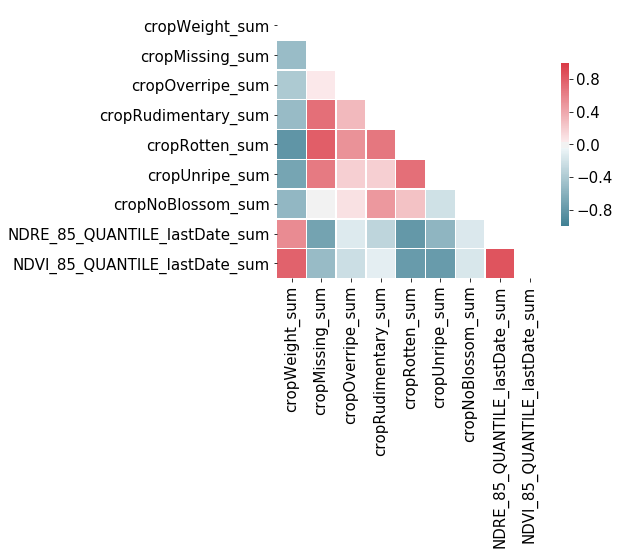

In [36]:
# Korrelationsmatrix nach Reihe (in Feld)
corr = broccoli_cropData_ByRow.drop('rowNumber', axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=False, vmin=-1, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})

In [37]:
broccoli_cropData_ByRow.drop('rowNumber', axis=1).corr()['NDVI_85_QUANTILE_lastDate_sum']

cropWeight_sum                   0.775026
cropMissing_sum                 -0.507900
cropOverripe_sum                -0.228059
cropRudimentary_sum             -0.100861
cropRotten_sum                  -0.766678
cropUnripe_sum                  -0.773059
cropNoBlossom_sum               -0.159566
NDRE_85_QUANTILE_lastDate_sum    0.858762
NDVI_85_QUANTILE_lastDate_sum    1.000000
Name: NDVI_85_QUANTILE_lastDate_sum, dtype: float64

## Meteomatics Daten

In [38]:
# Abfrage definieren und ausführen: Alle Meteomatics-Daten
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
SQL_Query = pd.read_sql_query('SELECT * FROM dbo.meteomatics where timestamp < \'2019-06-18\'', cnxn)
meteomatics_data = pd.DataFrame(SQL_Query)
cnxn.close()

meteomatics_data.head()

timestamp  temperature  relativeHumidity  absoluteHumidity  \
0 2019-04-08 07:56:07.257          7.0         93.900002               7.3   
1 2019-04-08 07:56:37.323          7.0         93.900002               7.3   
2 2019-04-08 08:00:00.023          7.0         93.699997               7.3   
3 2019-04-08 09:00:00.243          7.4         93.800003               7.5   
4 2019-04-08 10:00:00.207          7.8         94.199997               7.7   

   dewPoint  wind  cloudCover  precipitation  precipitationType  \
0       6.1   0.4   99.000000           0.04                0.0   
1       6.1   0.4   99.000000           0.04                0.0   
2       6.1   0.4   98.900002           0.03                0.0   
3       6.5   1.5  100.000000           0.10                0.0   
4       7.0   0.8  100.000000           0.03                0.0   

   precipitationProbability  hail  evaporation  frostDepth   radiation  \
0                       1.0   0.0        -0.01         0.0  126.000000   
1                       1.0   0.0        -0.01         0.0  126.000000   
2                       1.0   0.0        -0.04         0.0  138.300003   
3                       5.7   0.0        -0.04         0.0  337.299988   
4                       1.0   0.0        -0.09         0.0  529.599976   

   accumulatedEnergy  evapotranspiration  growingDegreeDays  leafWetness  
0       40193.898438                0.00                NaN          1.0  
1       40193.898438                0.00                NaN          1.0  
2       50195.300781                0.00                0.0          1.0  
3       59040.500000                0.04                NaN          1.0  
4       19428.500000                0.06                NaN          1.0

In [39]:
# Aggregieren der Meteomatics-Daten zwischen den Messzeitpunkten
# Datum eine Woche vor erstem Messdatum hinzufügen -> Wetterdaten-Aggregation bis zu diesem Zeitpunkt
meteomatics_aggregates = pd.DataFrame()
dates_Meteomatics =['2019-04-11'] + dates

i = 0
while i < (len(dates_Meteomatics) - 1):
    # Durchschnitte
    measurementPeriod_data = meteomatics_data[((meteomatics_data.timestamp >= dates_Meteomatics[i]) & 
                                               (meteomatics_data.timestamp < dates_Meteomatics[i+1]))][[
        'temperature', 'precipitation', 'radiation', 'relativeHumidity', 'wind', 'cloudCover']]
    measurementPeriod_data_agg_mean = pd.DataFrame(measurementPeriod_data.agg(['mean']))
    measurementPeriod_data_agg_mean = measurementPeriod_data_agg_mean.add_suffix('_mean')
    measurementPeriod_data_agg_mean.reset_index(inplace=True, drop=True)
    
    # Summen
    measurementPeriod_data = meteomatics_data[((meteomatics_data.timestamp >= dates_Meteomatics[i]) & 
                                               (meteomatics_data.timestamp < dates_Meteomatics[i+1]))][[
        'precipitation', 'accumulatedEnergy']]
    measurementPeriod_data_agg_sum = pd.DataFrame(measurementPeriod_data.agg(['sum']))
    measurementPeriod_data_agg_sum = measurementPeriod_data_agg_sum.add_suffix('_sum')
    measurementPeriod_data_agg_sum.reset_index(inplace=True, drop=True)
    
    # Durchschnitte und Summen zusammenfügen 
    measurementPeriod_data_agg = pd.concat([measurementPeriod_data_agg_mean, measurementPeriod_data_agg_sum], axis=1)
    
    # Datum von, Datum bis hinzufügen und Index definieren
    measurementPeriod_data_agg['dateFrom'] = dates_Meteomatics[i]
    measurementPeriod_data_agg['dateTo'] = dates_Meteomatics[i+1]
    measurementPeriod_data_agg['index'] = i
    measurementPeriod_data_agg.set_index(['index'], inplace=True)
    
    # Zu Aggregations-DataFrame hinzufügen
    meteomatics_aggregates = pd.concat([meteomatics_aggregates, measurementPeriod_data_agg], axis=0)
    
    i = i + 1
    
display(meteomatics_aggregates)

temperature_mean  precipitation_mean  radiation_mean  \
index                                                         
0              8.167262            0.019762      288.023810   
1             15.263095            0.006429      305.483928   
2              9.009722            0.193681      320.585417   
3              8.699476            0.117068      336.826703   
4              9.201190            0.157500      348.977976   
5             11.502604            0.323594      360.567709   
6             15.044867            0.064183      370.204183   
7             16.870233            0.341620      379.955093   
8             17.698333            0.034000      382.963335   

       relativeHumidity_mean  wind_mean  cloudCover_mean  precipitation_sum  \
index                                                                         
0                  78.371428   2.136905        73.358929               3.32   
1                  46.720833   5.640476        23.620238               1.08   
2                  75.047222   3.323611        84.314583              27.89   
3                  72.542408   2.657068        68.918325              22.36   
4                  72.144048   4.416667        61.736310              26.46   
5                  81.632813   2.378125        75.412500              62.13   
6                  75.316350   1.838783        54.486692              16.88   
7                  72.488372   2.853488        58.016279              73.79   
8                  73.420833   2.380833        56.290000               4.08   

       accumulatedEnergy_sum    dateFrom      dateTo  
index                                                 
0               5.737333e+07  2019-04-11  2019-04-18  
1               1.054758e+08  2019-04-18  2019-04-25  
2               1.725190e+07  2019-04-25  2019-05-01  
3               8.147357e+07  2019-05-01  2019-05-09  
4               5.001231e+07  2019-05-09  2019-05-16  
5               8.978750e+07  2019-05-16  2019-05-24  
6               1.613607e+08  2019-05-24  2019-06-04  
7               1.269055e+08  2019-06-04  2019-06-13  
8               8.599330e+07  2019-06-13  2019-06-18

In [40]:
broccoli_data_aggregates = pd.DataFrame()
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date][['medianNDVI', 'NDRE_85_QUANTILE', 'pixelCount']]
    broccoli_data_byDate_agg = pd.DataFrame(broccoli_data_byDate.agg(['mean']))
    broccoli_data_byDate_agg = broccoli_data_byDate_agg.add_suffix('_mean')
    broccoli_data_byDate_agg['date'] = date
    broccoli_data_aggregates = pd.concat([broccoli_data_aggregates, broccoli_data_byDate_agg], axis=0)
    
broccoli_data_aggregates.reset_index(inplace=True, drop=True)    
display(broccoli_data_aggregates)

medianNDVI_mean  NDRE_85_QUANTILE_mean  pixelCount_mean        date
0         0.508736               0.138751        37.410145  2019-04-18
1         0.586240               0.234079        46.112466  2019-04-25
2         0.686701               0.193679       125.839953  2019-05-01
3         0.784535               0.152841       337.265041  2019-05-09
4         0.778061               0.264955       451.688950  2019-05-16
5         0.803189               0.326153       992.890287  2019-05-24
6         0.792397               0.198119      1147.355879  2019-06-04
7         0.858615               0.367132      1455.834841  2019-06-13
8         0.855440               0.306422      1245.759733  2019-06-18

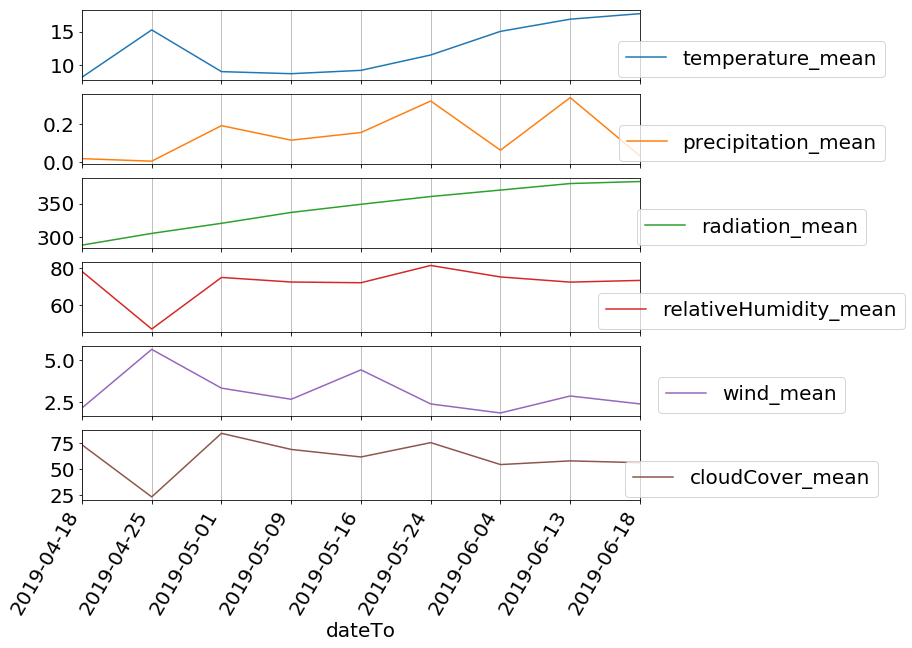

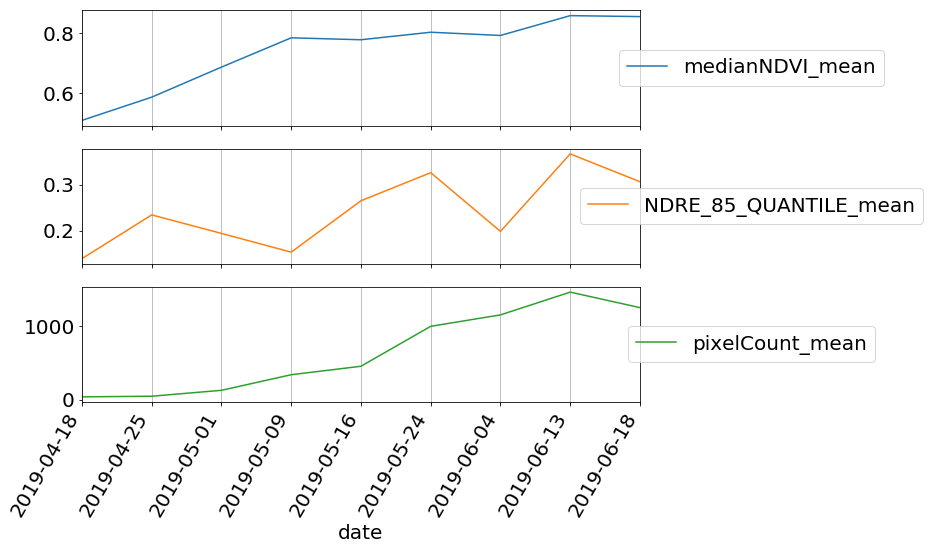

In [41]:
#plt.plot(broccoli_data_aggregates['date'],broccoli_data_aggregates[['meanNDVI']])
#plt.plot(meteomatics_aggregates['dateTo'],meteomatics_aggregates[['temperature', 'relativeHumidity','precipitation']])
#plt.show

# Schriftgrösse für Plots definieren
plt.rcParams.update({'font.size': 20})

axes = meteomatics_aggregates.drop(['precipitation_sum', 'accumulatedEnergy_sum'], axis=1).plot.line(
    x='dateTo', subplots=True, figsize=(10,10))
plt.xticks(rotation=60)
for ax in axes:
    ax.legend(loc='center', bbox_to_anchor=(1.2, 0.3), shadow=False, ncol=1)
    ax.xaxis.grid(True)
    
axes = broccoli_data_aggregates.plot.line(x='date', subplots=True, figsize=(10,8))
plt.xticks(rotation=60)
for ax in axes:
    ax.legend(loc='center', bbox_to_anchor=(1.2, 0.5), shadow=False, ncol=1)
    ax.xaxis.grid(True)
    
# Schriftgrösse für Plots zurücksetzen
plt.rcParams.update({'font.size': 15})

### Zusammensetzung der Wetter und Brokkoli-Daten


In [42]:
display(meteomatics_aggregates)
display(broccoli_data_aggregates)

temperature_mean  precipitation_mean  radiation_mean  \
index                                                         
0              8.167262            0.019762      288.023810   
1             15.263095            0.006429      305.483928   
2              9.009722            0.193681      320.585417   
3              8.699476            0.117068      336.826703   
4              9.201190            0.157500      348.977976   
5             11.502604            0.323594      360.567709   
6             15.044867            0.064183      370.204183   
7             16.870233            0.341620      379.955093   
8             17.698333            0.034000      382.963335   

       relativeHumidity_mean  wind_mean  cloudCover_mean  precipitation_sum  \
index                                                                         
0                  78.371428   2.136905        73.358929               3.32   
1                  46.720833   5.640476        23.620238               1.08   
2                  75.047222   3.323611        84.314583              27.89   
3                  72.542408   2.657068        68.918325              22.36   
4                  72.144048   4.416667        61.736310              26.46   
5                  81.632813   2.378125        75.412500              62.13   
6                  75.316350   1.838783        54.486692              16.88   
7                  72.488372   2.853488        58.016279              73.79   
8                  73.420833   2.380833        56.290000               4.08   

       accumulatedEnergy_sum    dateFrom      dateTo  
index                                                 
0               5.737333e+07  2019-04-11  2019-04-18  
1               1.054758e+08  2019-04-18  2019-04-25  
2               1.725190e+07  2019-04-25  2019-05-01  
3               8.147357e+07  2019-05-01  2019-05-09  
4               5.001231e+07  2019-05-09  2019-05-16  
5               8.978750e+07  2019-05-16  2019-05-24  
6               1.613607e+08  2019-05-24  2019-06-04  
7               1.269055e+08  2019-06-04  2019-06-13  
8               8.599330e+07  2019-06-13  2019-06-18

medianNDVI_mean  NDRE_85_QUANTILE_mean  pixelCount_mean        date
0         0.508736               0.138751        37.410145  2019-04-18
1         0.586240               0.234079        46.112466  2019-04-25
2         0.686701               0.193679       125.839953  2019-05-01
3         0.784535               0.152841       337.265041  2019-05-09
4         0.778061               0.264955       451.688950  2019-05-16
5         0.803189               0.326153       992.890287  2019-05-24
6         0.792397               0.198119      1147.355879  2019-06-04
7         0.858615               0.367132      1455.834841  2019-06-13
8         0.855440               0.306422      1245.759733  2019-06-18

In [43]:
#Zusammenfügen der Brokkoli und Wetter Daten
weather_broccoli_aggregates = pd.concat([meteomatics_aggregates, broccoli_data_aggregates], axis=1)
weather_broccoli_aggregates.drop(['dateFrom', 'dateTo', 'date'], axis=1, inplace=True)

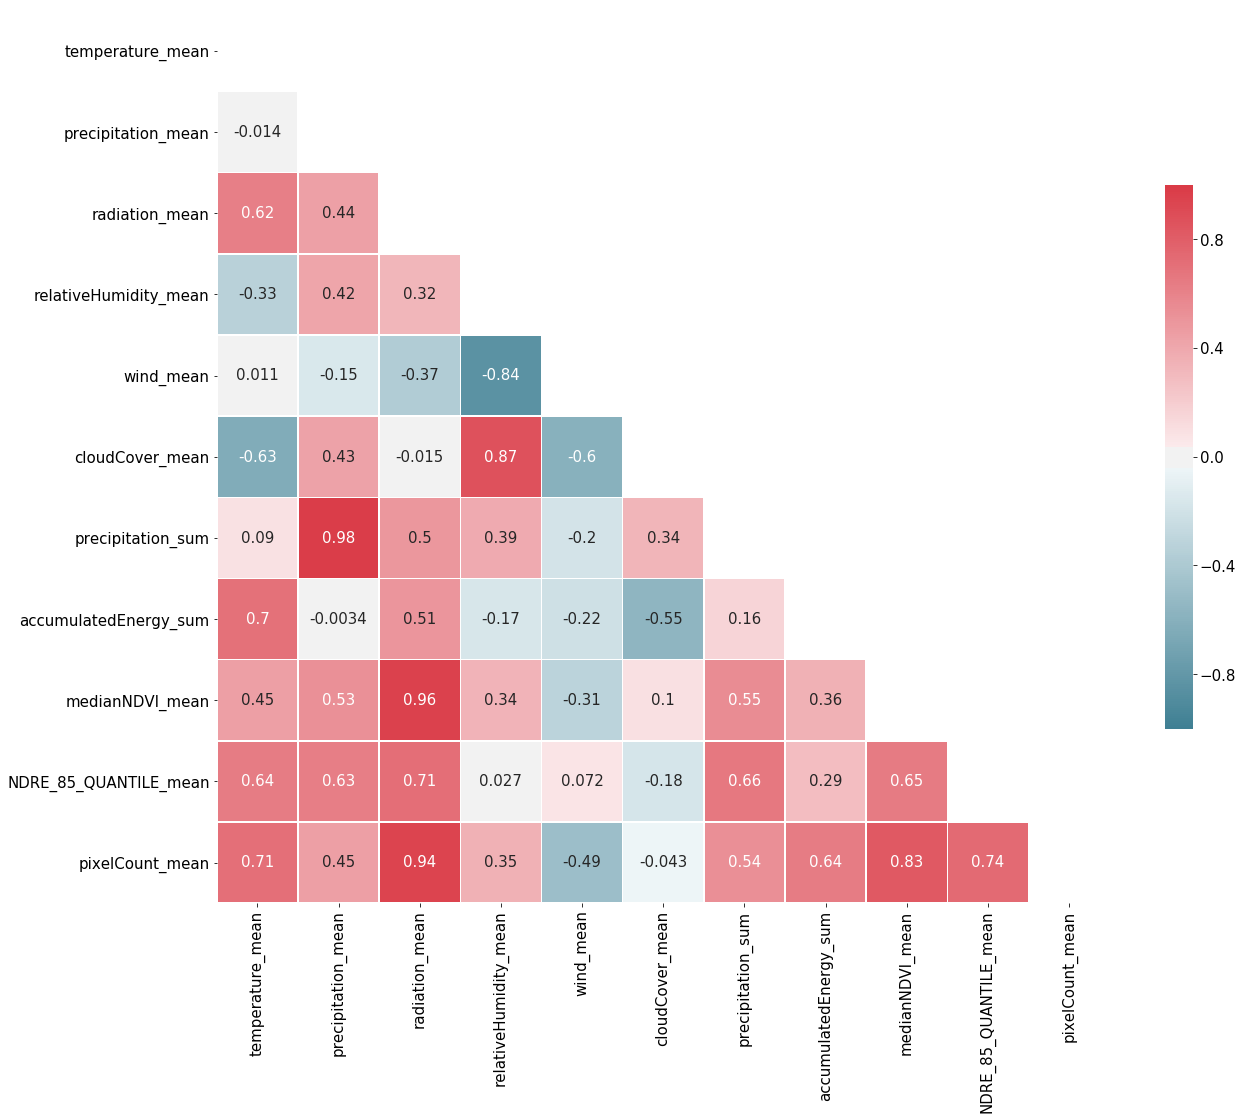

In [44]:
from sklearn import preprocessing 
x = weather_broccoli_aggregates.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_weather_broccoli_aggregates = pd.DataFrame(x_scaled, columns=weather_broccoli_aggregates.columns) 

corr = normalized_weather_broccoli_aggregates.corr()

# sns.set(font_scale=2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, vmin=-1, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})

In [45]:
normalized_weather_broccoli_diff = normalized_weather_broccoli_aggregates.diff()
normalized_weather_broccoli_diff = normalized_weather_broccoli_diff.add_suffix(
    '_diff')
normalized_weather_broccoli_diff

temperature_mean_diff  precipitation_mean_diff  radiation_mean_diff  \
0                    NaN                      NaN                  NaN   
1               0.744495                -0.039778             0.183908   
2              -0.656104                 0.558641             0.159064   
3              -0.032551                -0.228563             0.171070   
4               0.052640                 0.120623             0.127990   
5               0.241464                 0.495519             0.122075   
6               0.371654                -0.773919             0.101501   
7               0.191517                 0.827699             0.102707   
8               0.086884                -0.917744             0.031686   

   relativeHumidity_mean_diff  wind_mean_diff  cloudCover_mean_diff  \
0                         NaN             NaN                   NaN   
1                   -0.906583        0.921582             -0.819495   
2                    0.811366       -0.609430              1.000000   
3                   -0.071747       -0.175328             -0.253669   
4                   -0.011410        0.462846             -0.118331   
5                    0.271791       -0.536219              0.225329   
6                   -0.180925       -0.141869             -0.344774   
7                   -0.081003        0.266909              0.058153   
8                    0.026709       -0.124328             -0.028442   

   precipitation_sum_diff  accumulatedEnergy_sum_diff  medianNDVI_mean_diff  \
0                     NaN                         NaN                   NaN   
1               -0.030807                    0.333793              0.221518   
2                0.368725                   -0.612204              0.287129   
3               -0.076056                    0.445647              0.279623   
4                0.056388                   -0.218316             -0.018503   
5                0.490579                    0.276008              0.071818   
6               -0.622335                    0.496661             -0.030845   
7                0.782698                   -0.239092              0.189260   
8               -0.958740                   -0.283898             -0.009075   

   NDRE_85_QUANTILE_mean_diff  pixelCount_mean_diff  
0                         NaN                   NaN  
1                    0.417408              0.006135  
2                   -0.176897              0.056208  
3                   -0.178818              0.149056  
4                    0.490912              0.080670  
5                    0.267964              0.381551  
6                   -0.560618              0.108899  
7                    0.740049              0.217480  
8                   -0.265826             -0.148105

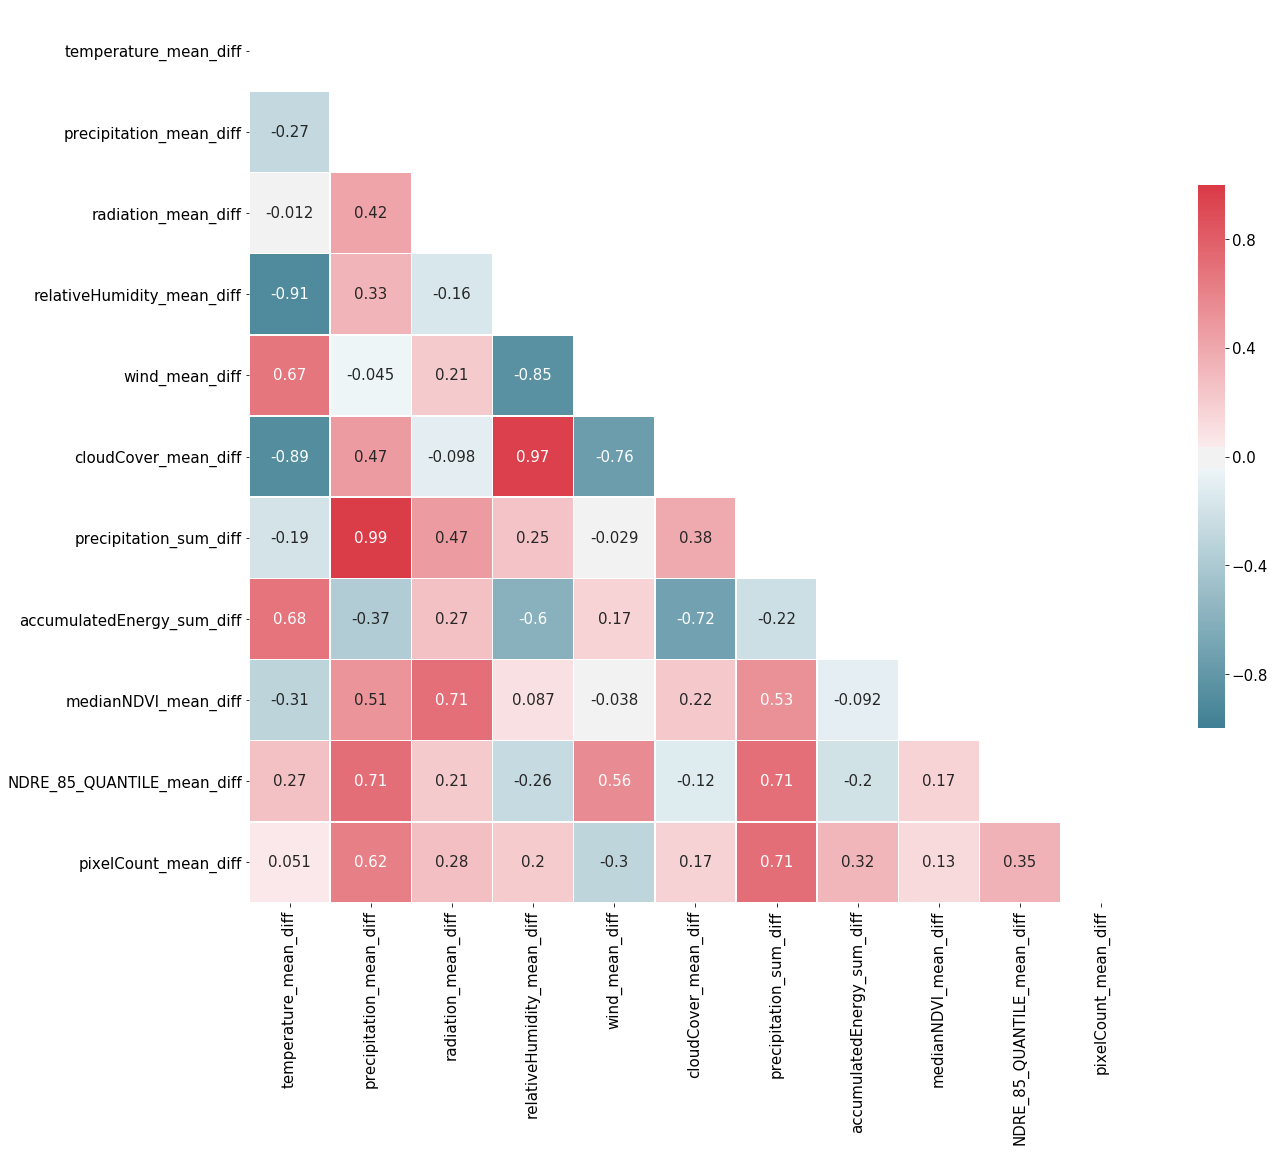

In [46]:
# Korrelationen der Differenzen
corr = normalized_weather_broccoli_diff.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, vmin=-1, vmax=1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})

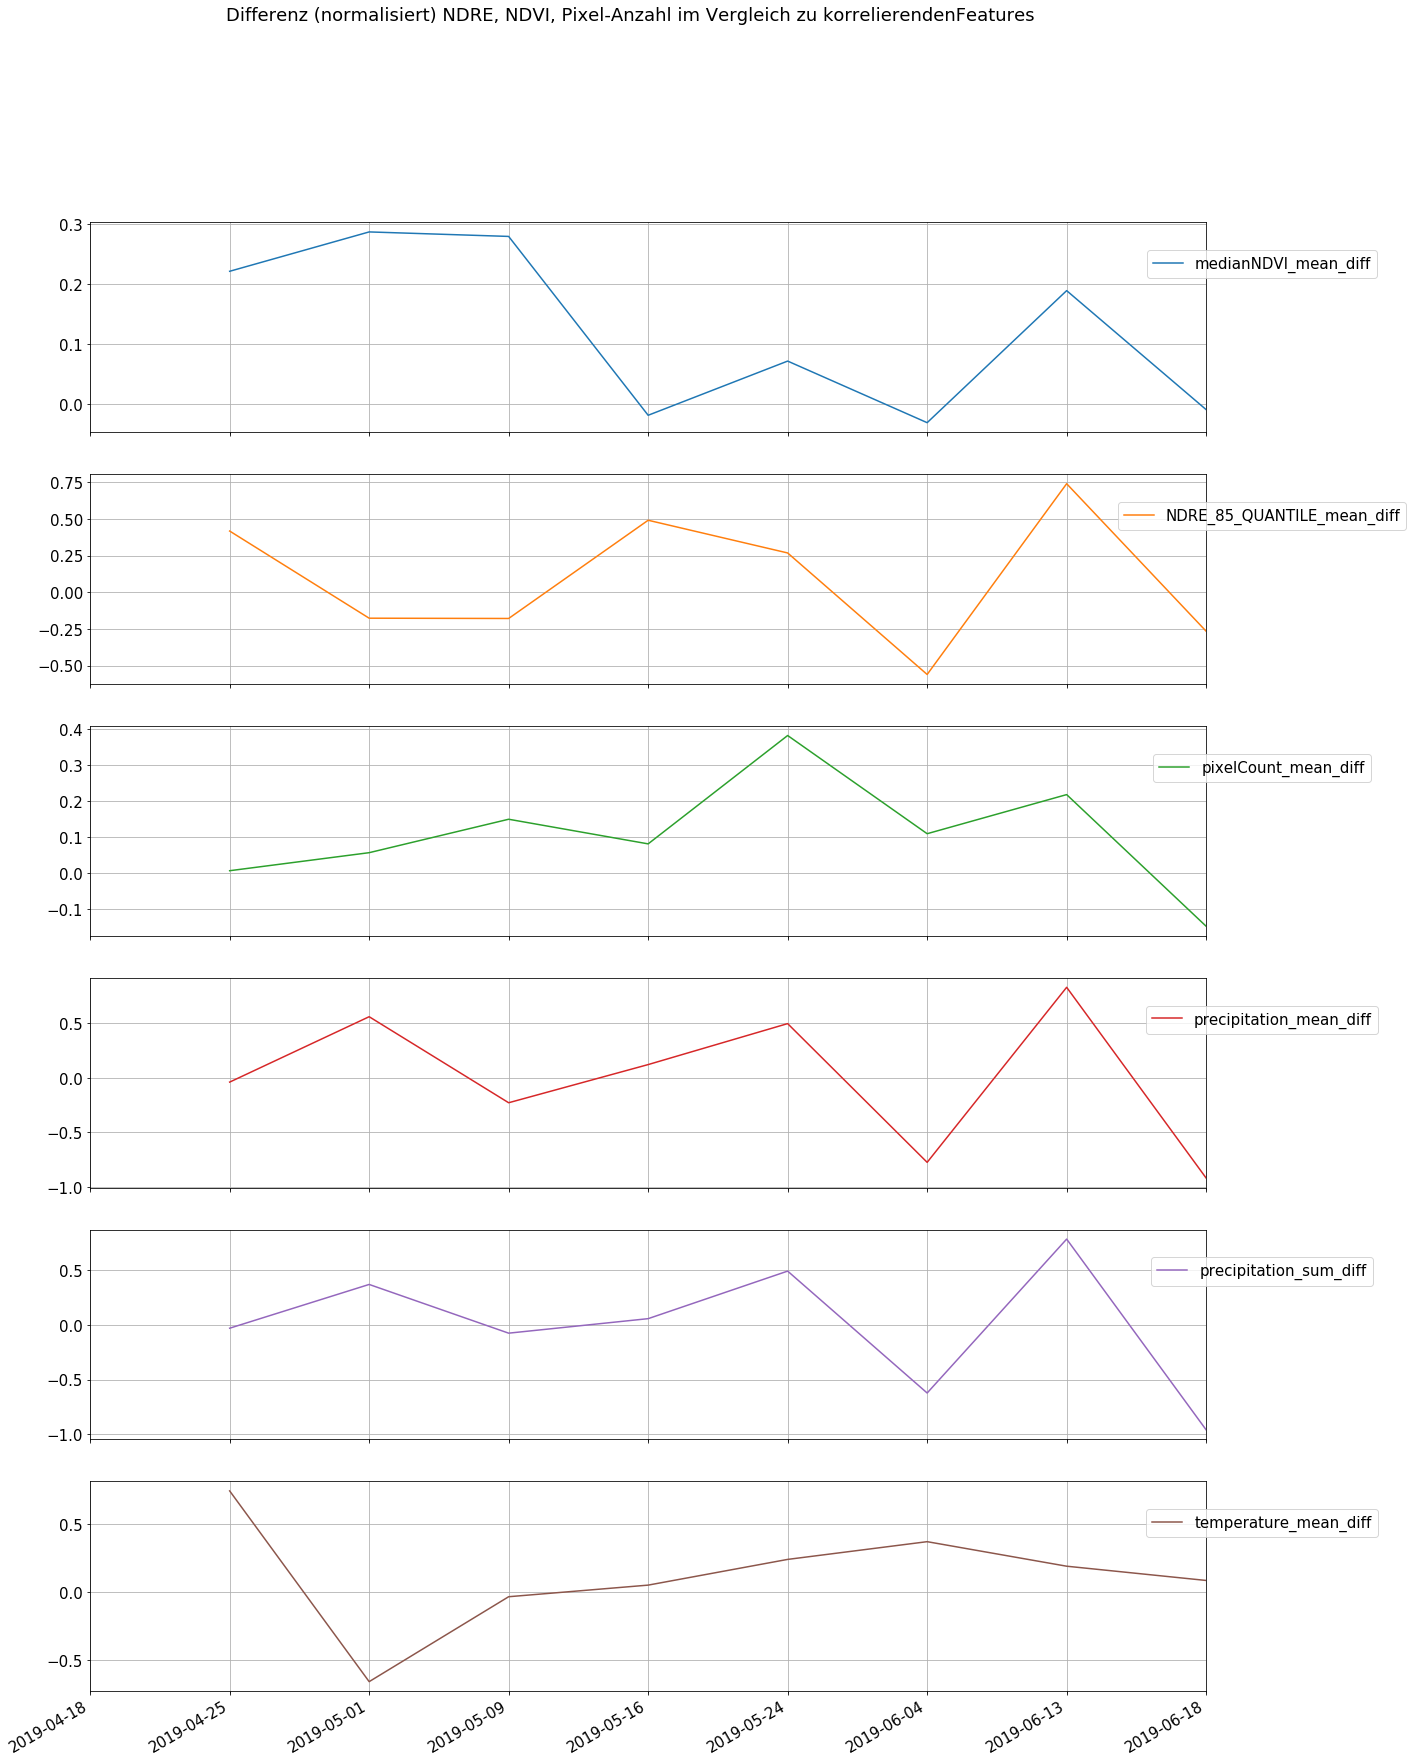

In [47]:
axes = normalized_weather_broccoli_diff.plot(y=['medianNDVI_mean_diff', 'NDRE_85_QUANTILE_mean_diff', 'pixelCount_mean_diff', 
                                         'precipitation_mean_diff', 'precipitation_sum_diff', 'temperature_mean_diff'], 
                                      title='''Differenz (normalisiert) NDRE, NDVI, Pixel-Anzahl im Vergleich zu korrelierendenFeatures''',
                                      subplots=True,figsize=(20,30), grid=True)

axes[len(axes)-1].set_xticklabels(dates)

for ax in axes:
    ax.legend(loc='center', bbox_to_anchor=(1.05, 0.8), shadow=False, ncol=1)
    ax.xaxis.grid(True)